In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [133]:
data = pd.read_excel('C:\\Users\\Mahdou\\Downloads\\dataset.xlsx')

In [134]:
data

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

# A) Exploratory Data Analysis :

Objective:

 * Understand our data as best as possible
 * Develop an initial modeling strategy

Shape Analysis:
 * target variable: SARS-Cov-2 exam result
 * rows and columns: 5644, 111
 * types of variables: qualitative: 70, quantitative: 41

Analysis of missing values:
 * a lot of missing values (several variables have more than 90 % of missing values)
 * 2 groups of data 76% -> Viral test, 89% -> blood levels

Visualization of the target:

 * 10% positive (558/5000)
 * 90 % negative 

Meaning of variables:

 * standardized continuous variables, skewed (asymmetric), blood test
 * age quantile: difficult to interpret this graph, clearly this data has been processed, one could think 0-5, but this could also be a mathematical transformation. We can't know because the person who put this dataset doesn't specify it anywhere. But that's not very important !!!!
 * qualitative variable: binary (0, 1), viral, Rhinovirus which seems very high

Variables / Target relationship:

 * target / blood: the levels of Monocytes, Platelets, Leukocytes seem linked to covid-19 -> hypothesis to be tested
 * target/age: young individuals are very little contaminated? -> be careful, we do not know the age, and we do not know when the dataset dates from (if it concerns children we know that children are affected as much as adults). On the other hand, this variable could be interesting to compare it with the results of blood tests.
 * target / viral: dual diseases are very rare. Rhinovirus/Enterovirus positive - covid-19 negative? -> hypothesis to test? but it is possible that the region is experiencing an epidemic of this virus. In addition, we can very well have 2 viruses at the same time. All of this has no connection with covid-19

# More detailed analysis:

Relationship Variables / Variables:

 * blood_data / blood_data: certain variables are very correlated: +0.9 (to be monitored later)
 * blood_data / age: very weak correlation between age and blood levels
 * viral / viral: influenza rapid test gives poor results, it may be necessary to drop it
 * disease / blood data relationship: Blood levels between patients and covid-19 are different
 * hospitalization/is sick relationship:
 * hospitalization / blood relationship: interesting in the case where we want to predict which department a patient should go to

NaN analysis: viral: 1350(92/8), blood: 600(87/13), both: 90

# Null hypotheses (H0):

 * Individuals affected by covid-19 have significantly different levels of Leukocytes, Monocytes, Platelets

 * H0 = Mean rates are EQUAL in positive and negative individuals
 *Individuals with any disease have significantly different rates

# Data shape analysis :

In [135]:
df = data.copy()

In [136]:
df.shape

(5644, 111)

In [137]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [138]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

we have 3 types of variables : float, object and int 

<Axes: ylabel='count'>

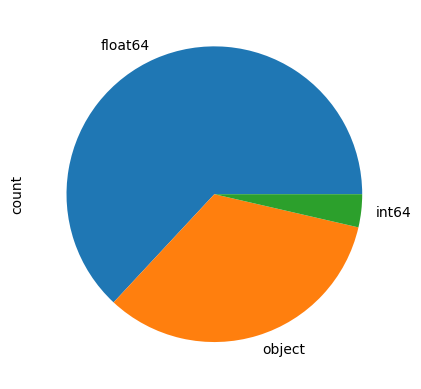

In [139]:
df.dtypes.value_counts().plot.pie()

In [140]:
df.isna()  ### True in a dataframe indicates a missing value,

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<Axes: >

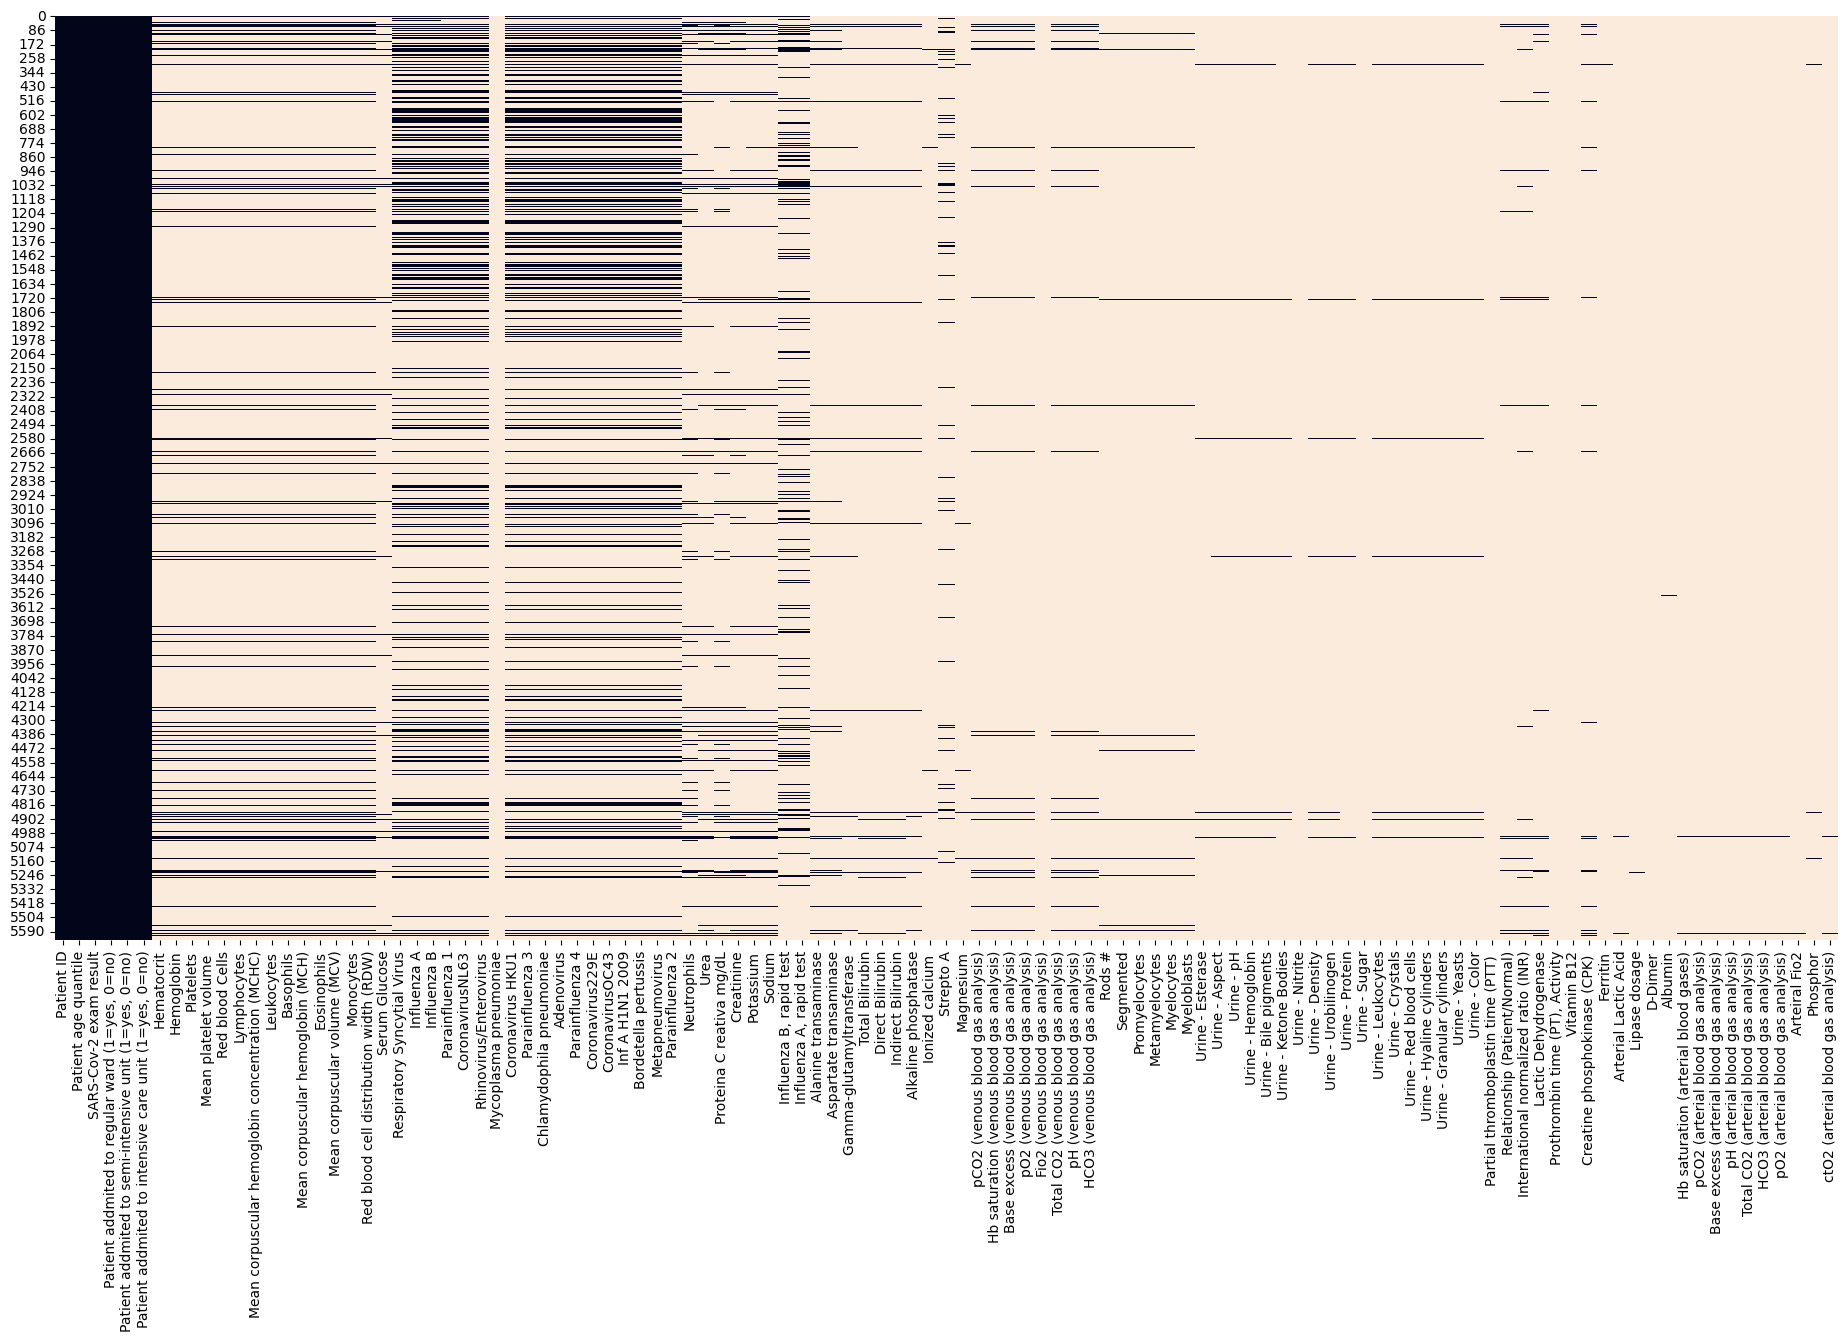

In [141]:
plt.figure(figsize=(23,12))
sns.heatmap(df.isna(), cbar=False)

In [142]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

we note that for example 'patient id' have 0 missing values and others have more than 5600 !!!!!!!!

In [143]:
df.isna().sum()/df.shape[0]  ### afficher ca en %

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [144]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Background Analysis:

# 1. Initial visualization - Elimination of unnecessary columns

In [145]:
df.isna().sum()/df.shape[0] < 0.9

Patient ID                                                True
Patient age quantile                                      True
SARS-Cov-2 exam result                                    True
Patient addmited to regular ward (1=yes, 0=no)            True
Patient addmited to semi-intensive unit (1=yes, 0=no)     True
Patient addmited to intensive care unit (1=yes, 0=no)     True
Hematocrit                                                True
Hemoglobin                                                True
Platelets                                                 True
Mean platelet volume                                      True
Red blood Cells                                           True
Lymphocytes                                               True
Mean corpuscular hemoglobin concentration (MCHC)          True
Leukocytes                                                True
Basophils                                                 True
Mean corpuscular hemoglobin (MCH)                      

In [146]:
df.columns[df.isna().sum()/df.shape[0] < 0.9]

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'In

In [147]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [148]:
df.shape

(5644, 39)

### after removing columns who have more than 90 % of missing values, now we only have 39 columns 

# Target column review :

In [149]:
df['SARS-Cov-2 exam result']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [150]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)   #value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

we can see that 90% of target are negative 

# histograms of continuous variables :

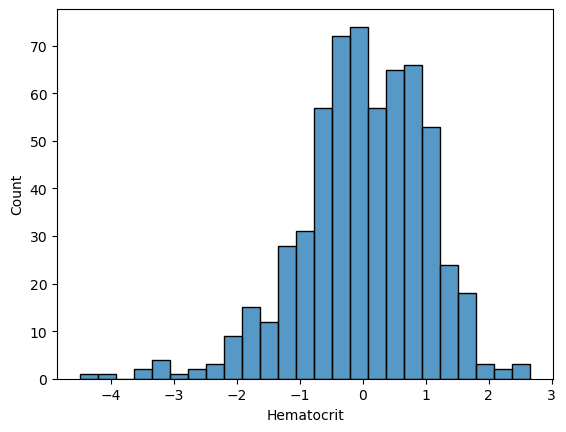

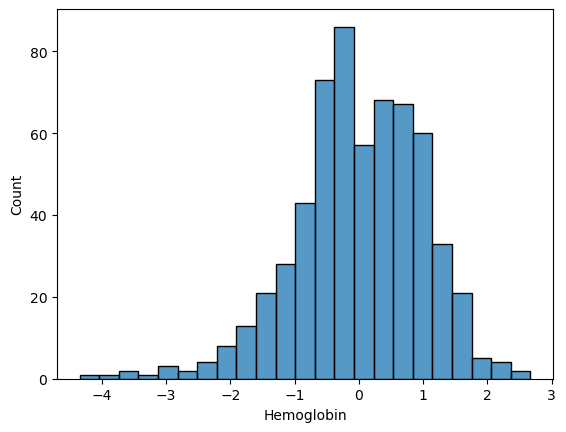

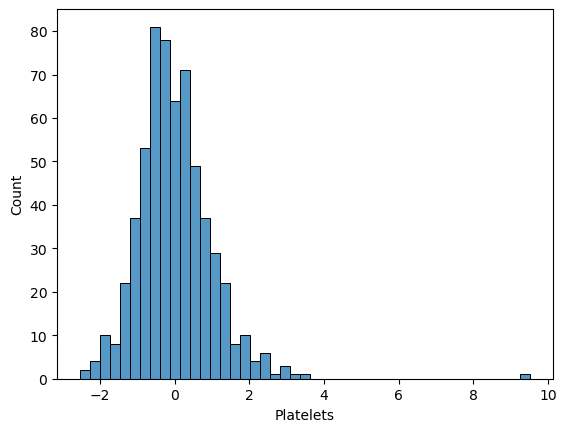

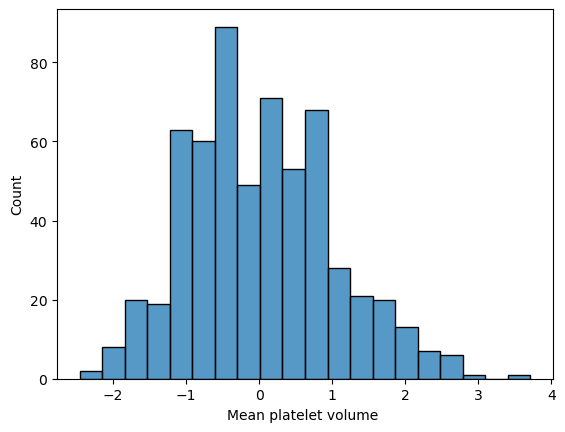

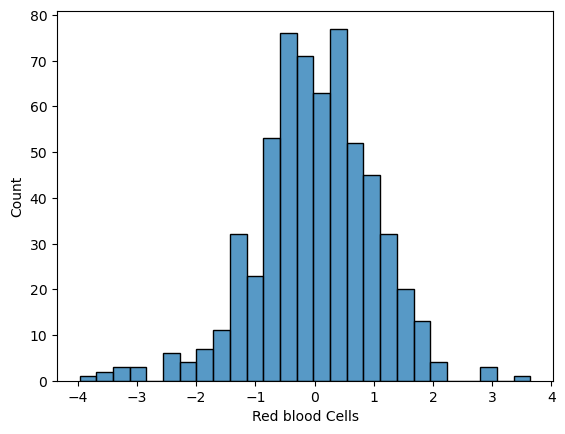

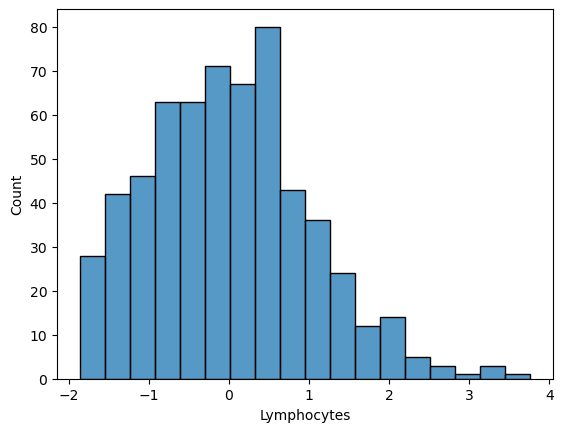

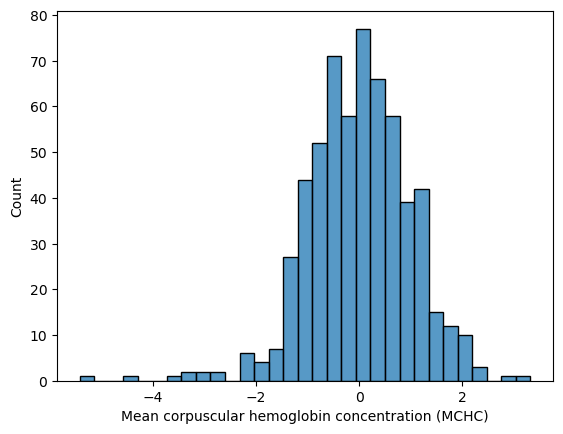

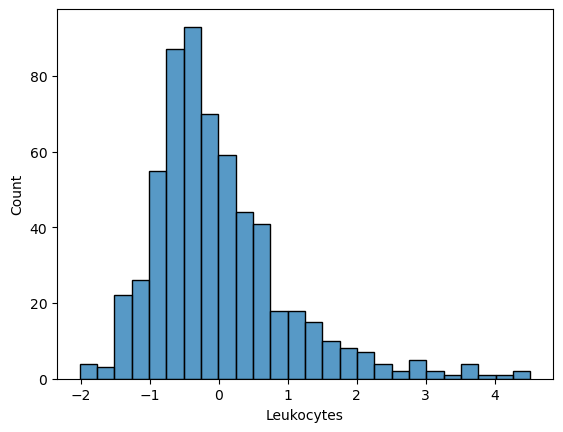

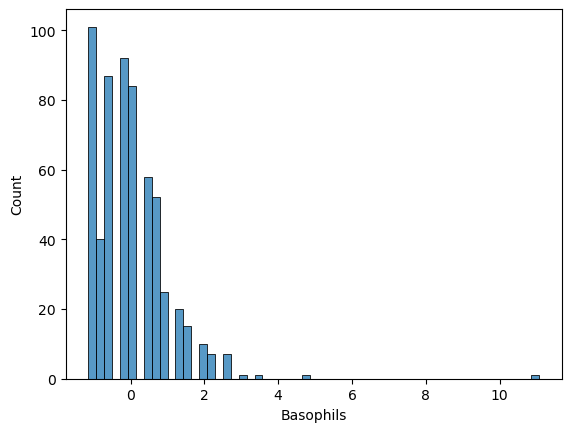

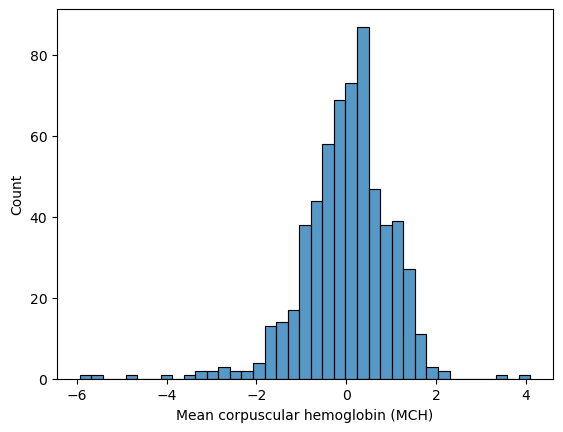

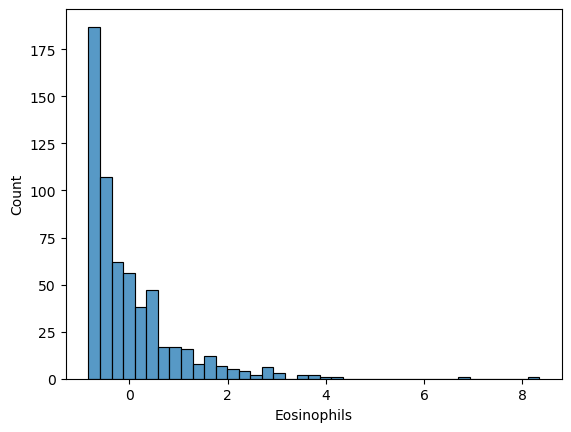

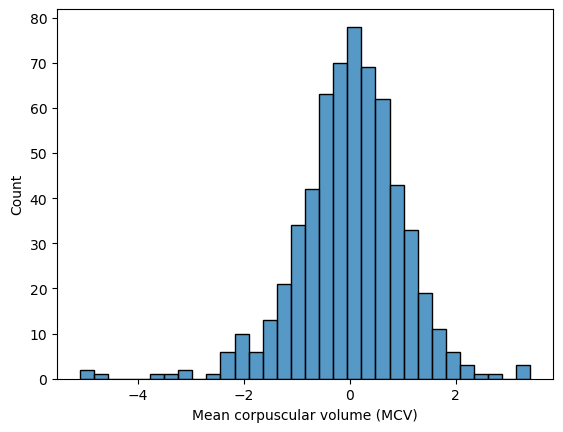

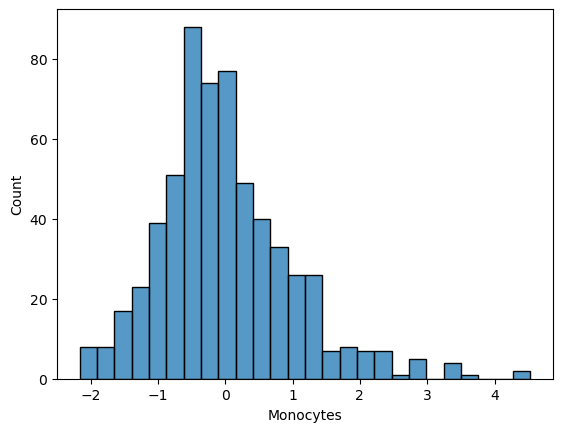

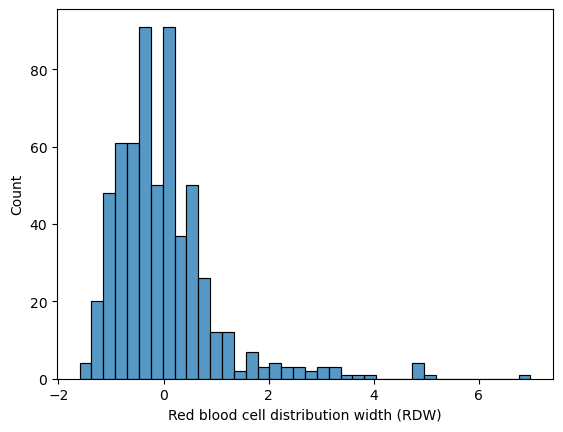

In [151]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])    

<Axes: xlabel='Patient age quantile', ylabel='Count'>

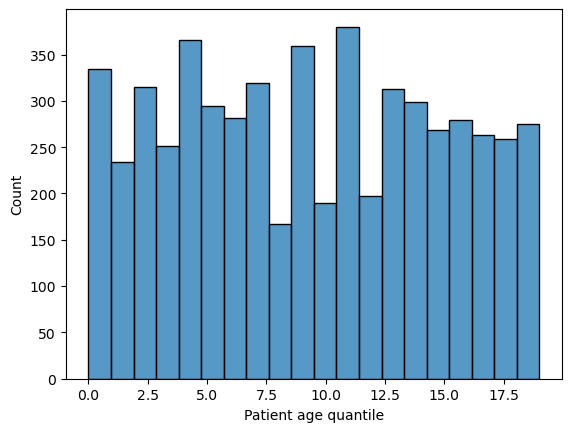

In [152]:
sns.histplot(df['Patient age quantile'], bins=20)

In [153]:
df['Patient age quantile'].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

# Qualitative Variables :

In [154]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Patient ID---------------------------------------- ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus--

C:\Users\Mahdou\AppData\Local\Temp\ipykernel_13212\2948468838.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


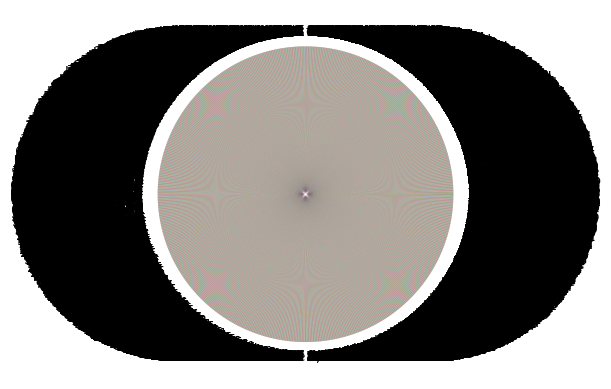

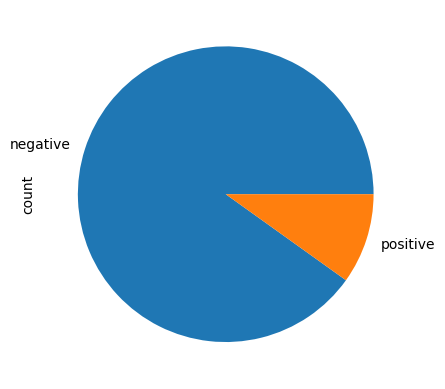

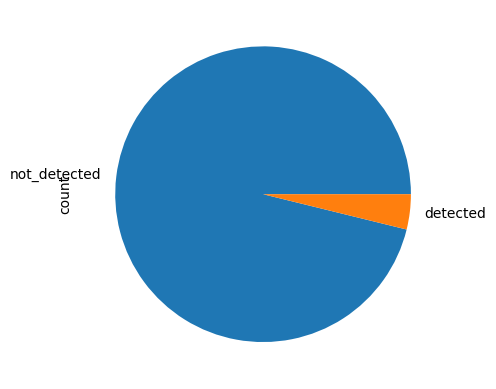

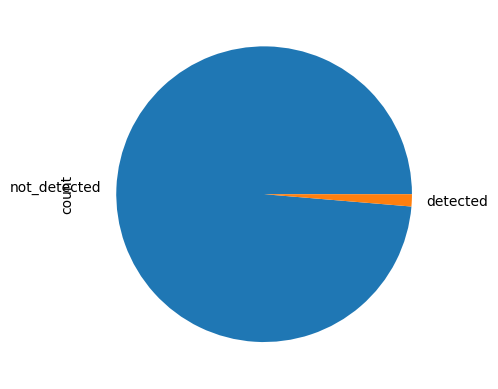

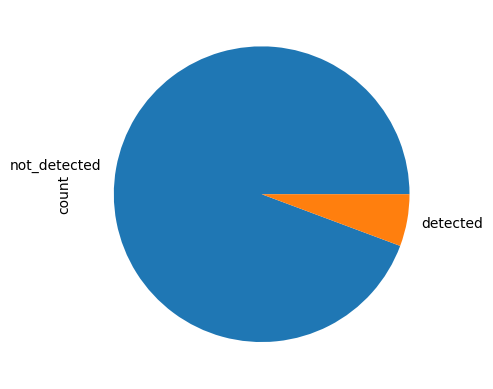

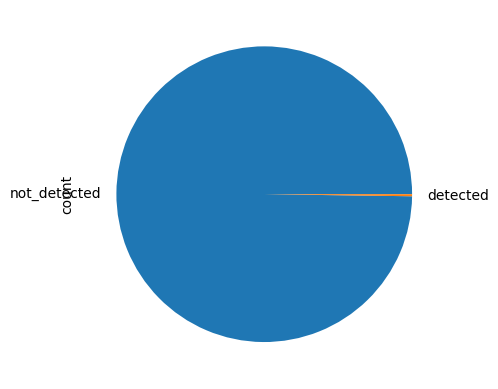

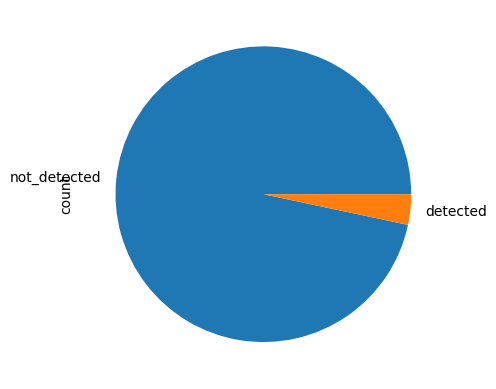

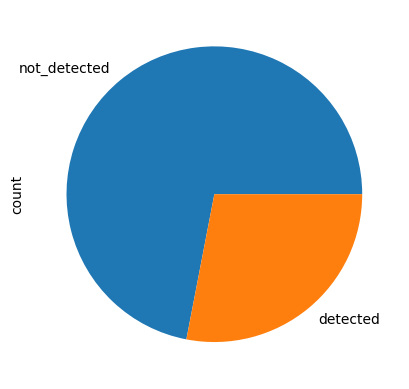

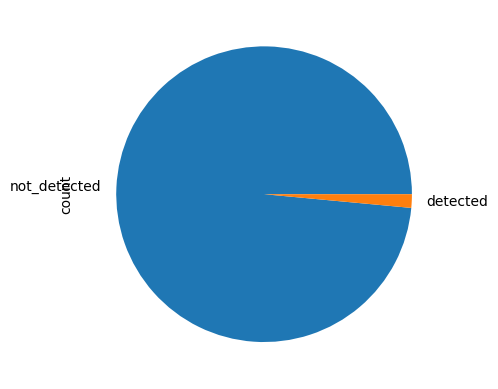

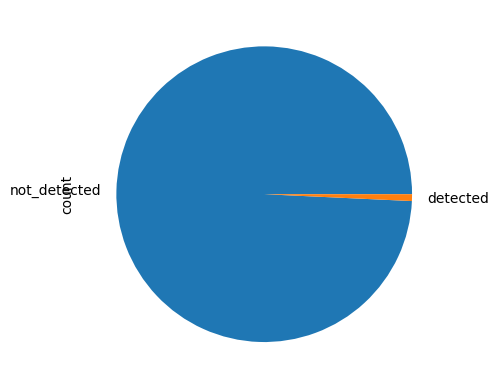

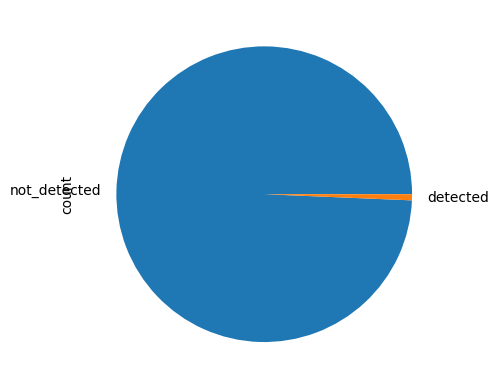

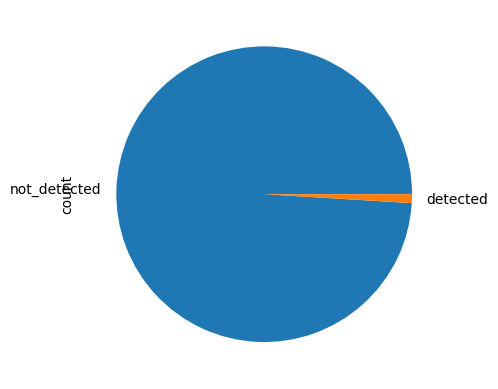

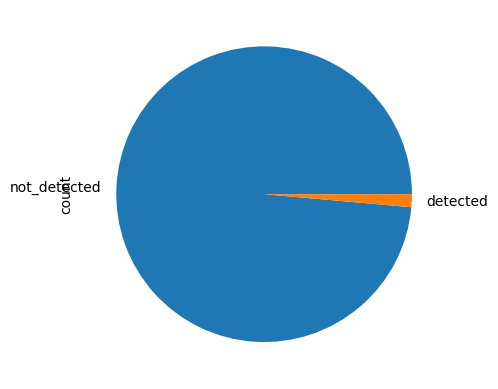

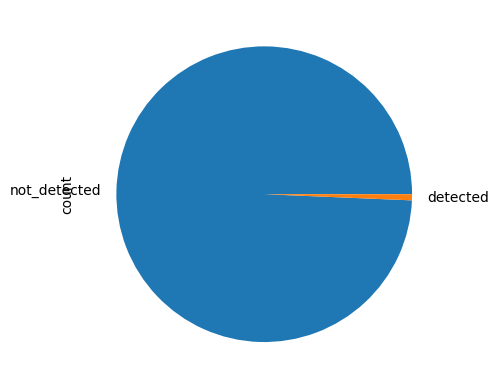

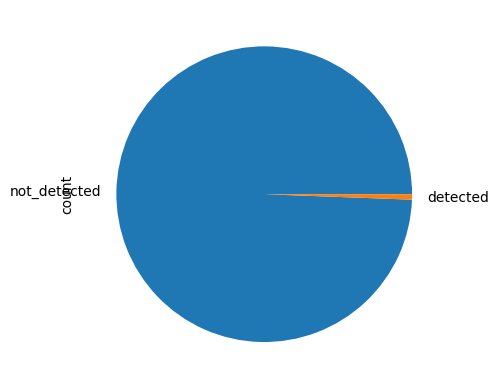

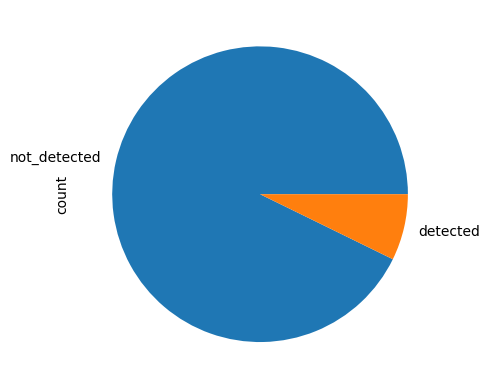

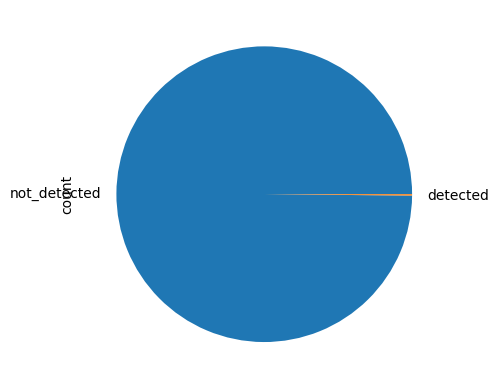

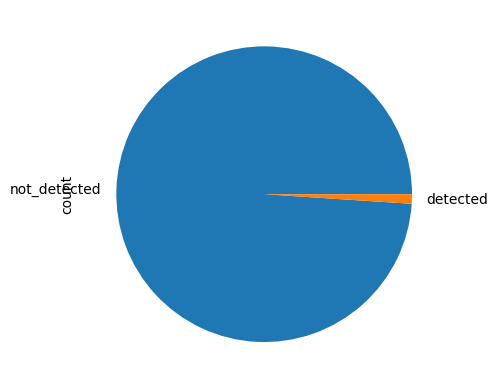

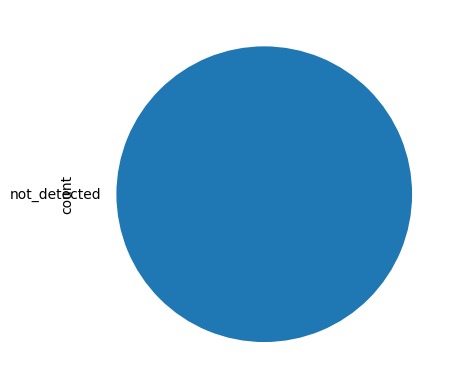

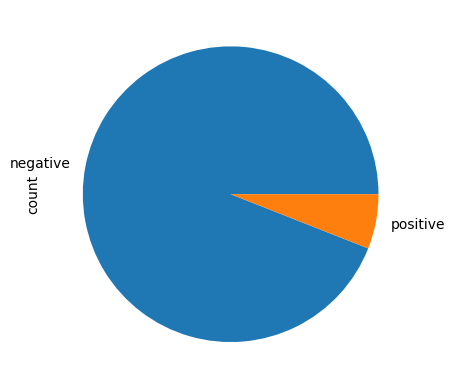

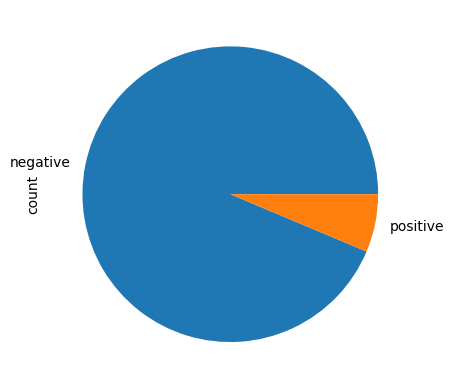

In [155]:
for col in df.select_dtypes('object'):    
    plt.figure()
    df[col].value_counts().plot.pie()
    

# Relation between Target / Variables

## Creation of positive and negative subsets :

### we create two subsets, one for the people tested positive and the other for the people tested negative

In [156]:
pos_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [157]:
neg_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [158]:
pos_df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
67    78511c183ae18bc                     7               positive   
284   d7834ed75f2da44                    16               positive   
513   b16b49f7bd3e692                    10               positive   
568   4382f5ea05e60c4                     2               positive   
676   d3729cd2658ca64                    15               positive   
...               ...                   ...                    ...   
5632  5c386388ba3c3f0                    16               positive   
5633  9f8dfe2ae239238                     4               positive   
5634  db77903261ab6d0                    15               positive   
5639  ae66feb9e4dc3a0                     3               positive   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [159]:
neg_df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5637  2ea15fb0c220027                    12               negative   
5638  21af7c93c7fc540                    14               negative   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1       -0.02234  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5637         NaN        NaN                    NaN              NaN   
5638         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN        

## Creation of the Blood and Viral sets :

In [160]:
miss_val = df.isna().sum()/df.shape[0]

In [161]:
miss_val

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [162]:
blood_col = df.columns[(miss_val < 0.9) & (miss_val >0.88)]

In [163]:
viral_col = df.columns[(miss_val < 0.88) & (miss_val > 0.75)]

In [164]:
blood_col

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [165]:
viral_col

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

## Relation between Target variable and Blood :

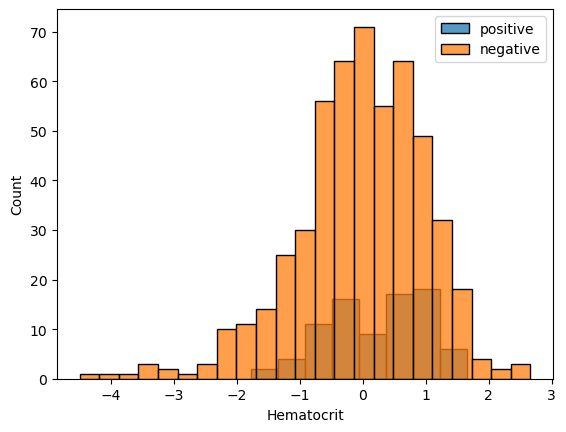

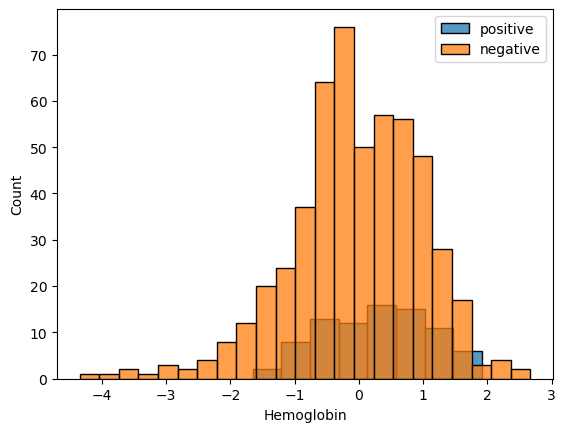

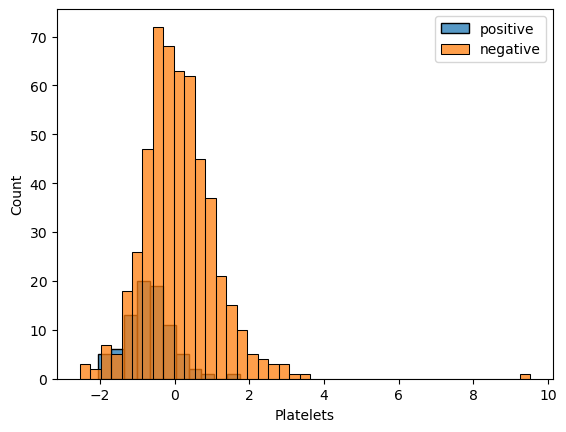

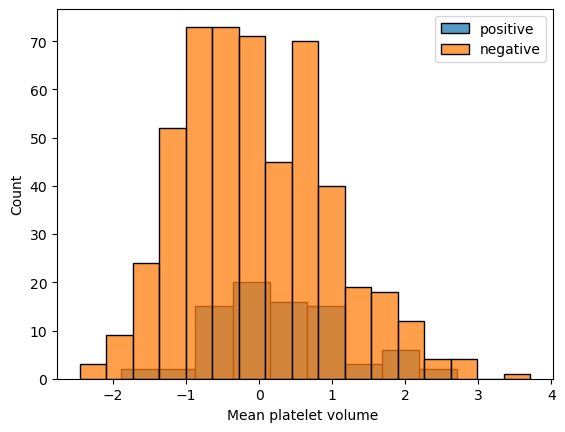

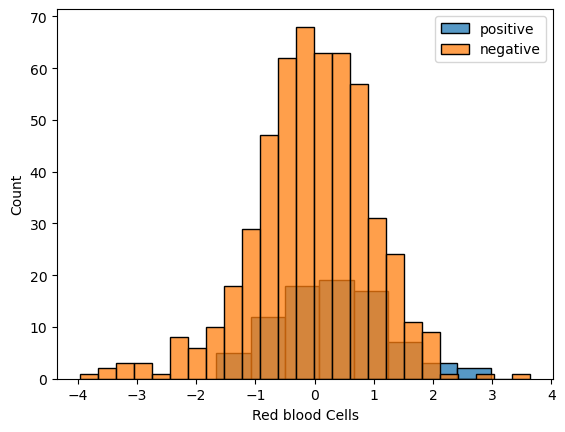

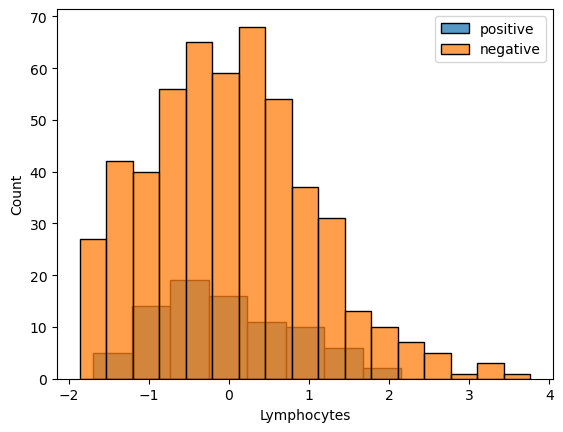

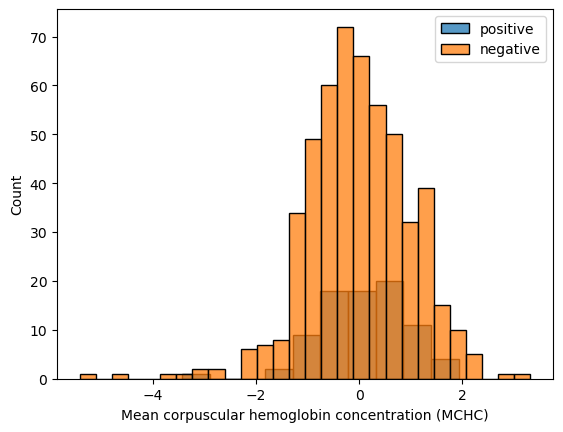

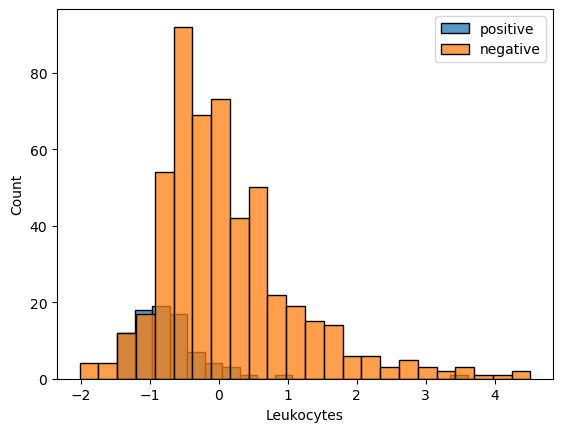

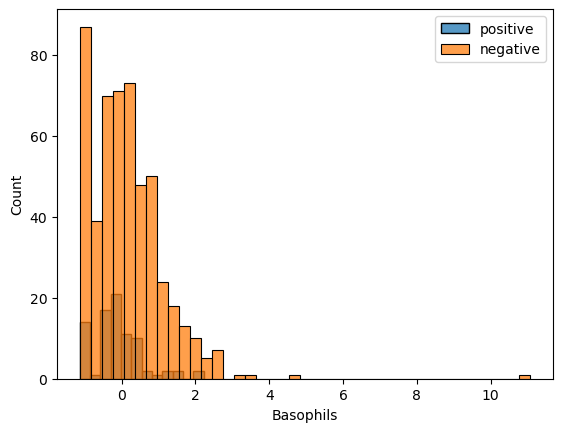

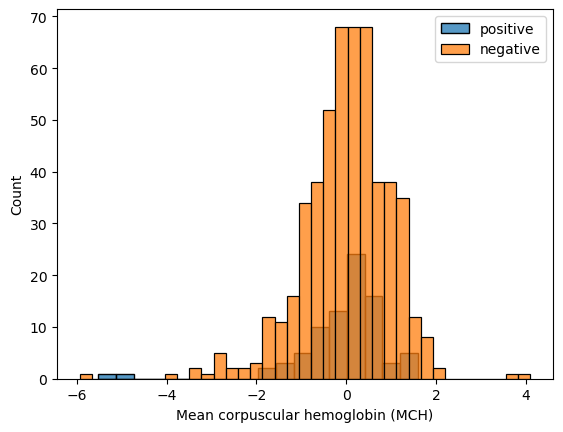

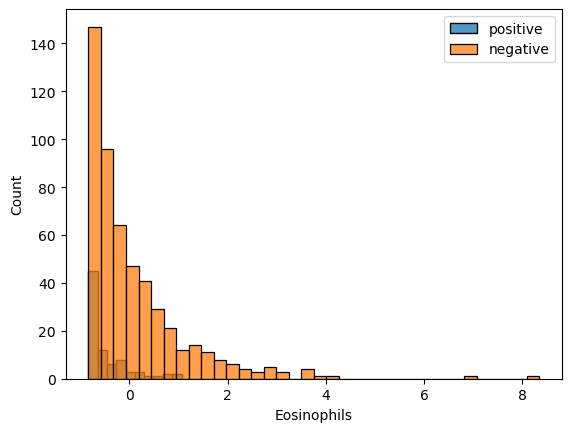

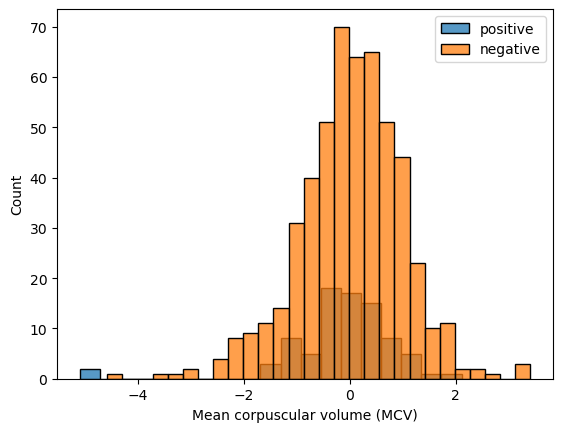

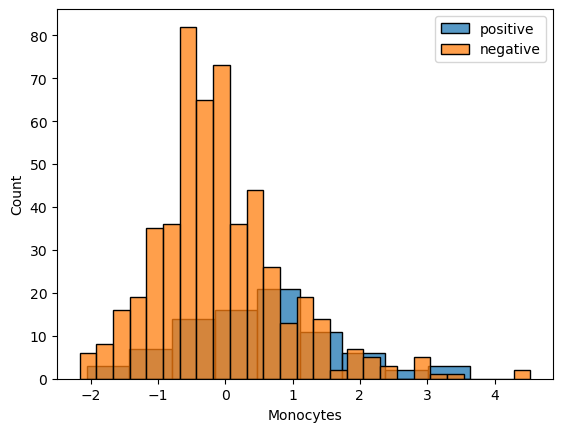

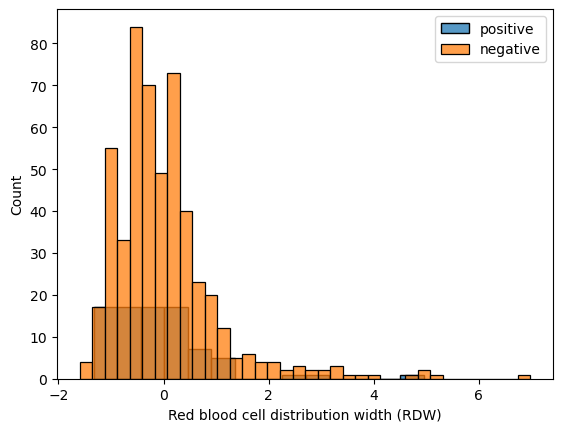

In [166]:
for col in blood_col:
    plt.figure()
    sns.histplot(pos_df[col], label='positive')
    sns.histplot(neg_df[col], label='negative')
    plt.legend()

## Relation between Target variable and  age:

<Axes: xlabel='Patient age quantile', ylabel='Count'>

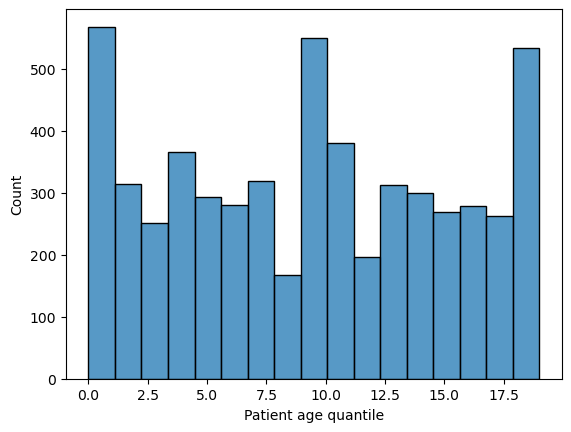

In [167]:
sns.histplot(df['Patient age quantile'], label='age, target')

## Relation between Target  and Viral :

In [168]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

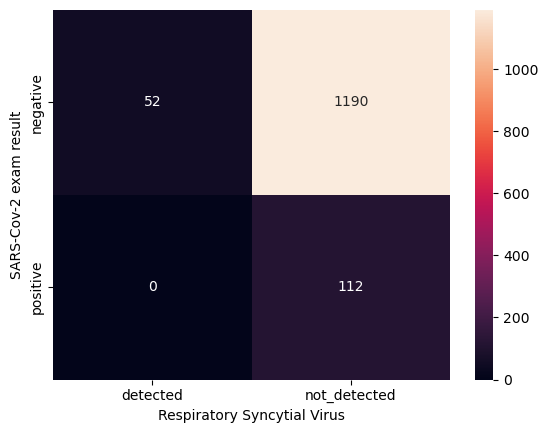

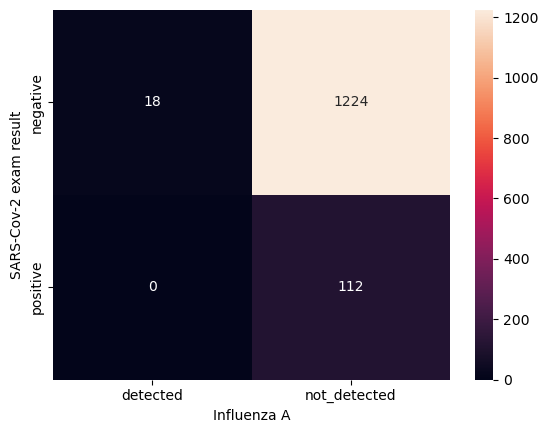

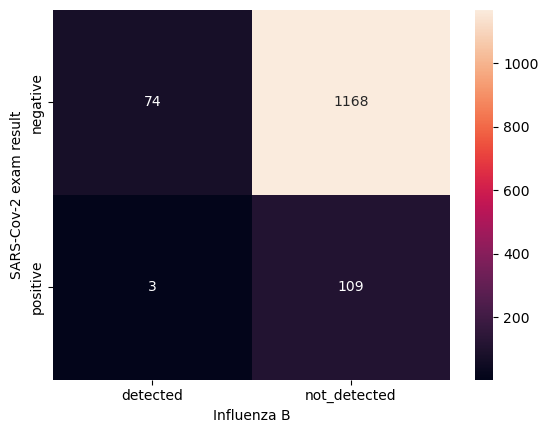

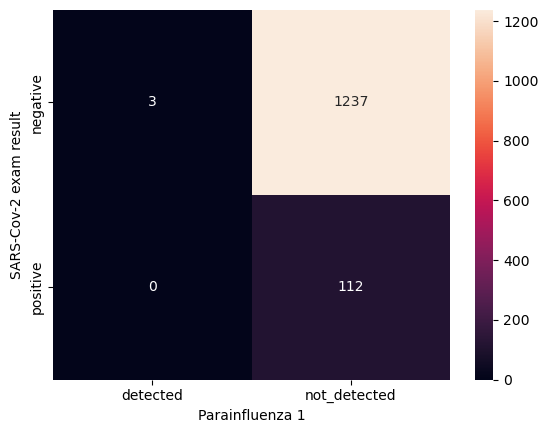

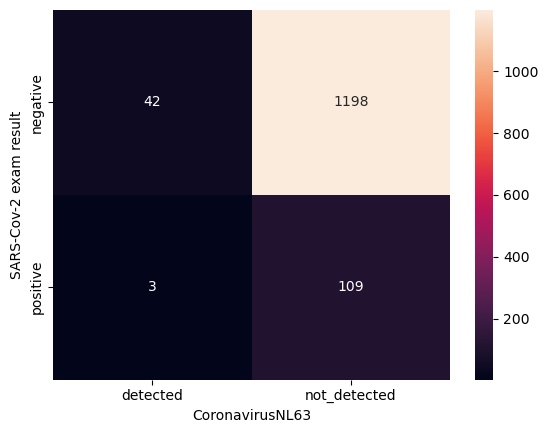

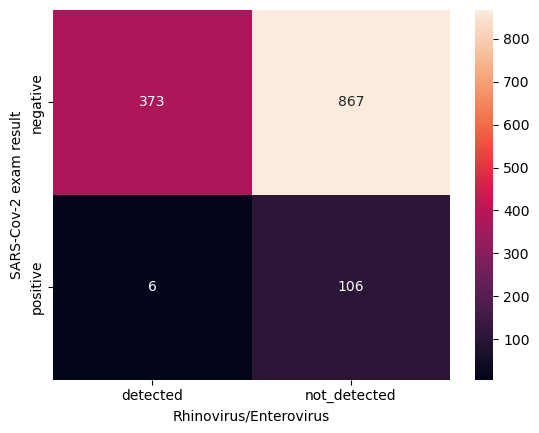

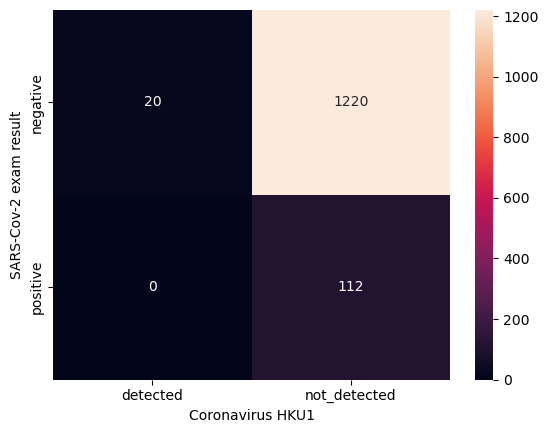

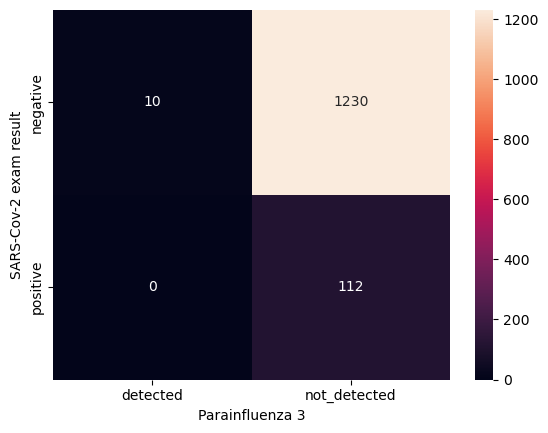

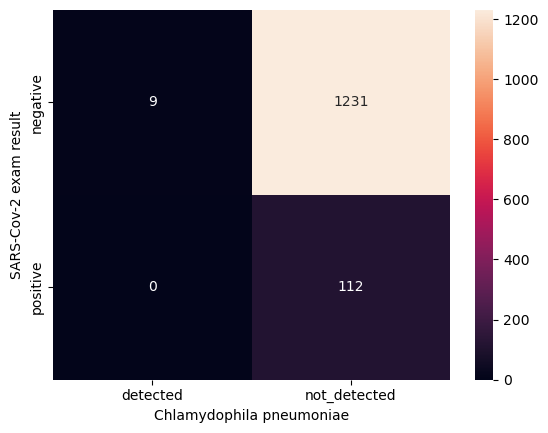

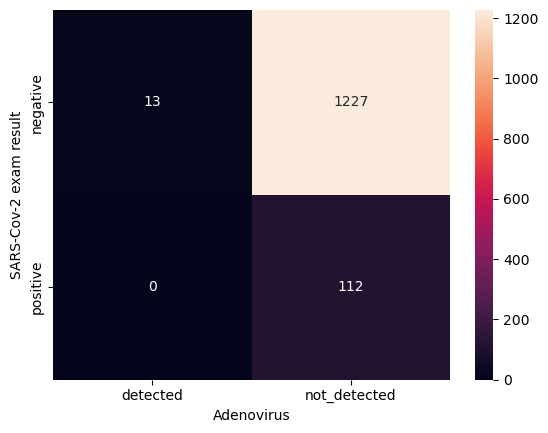

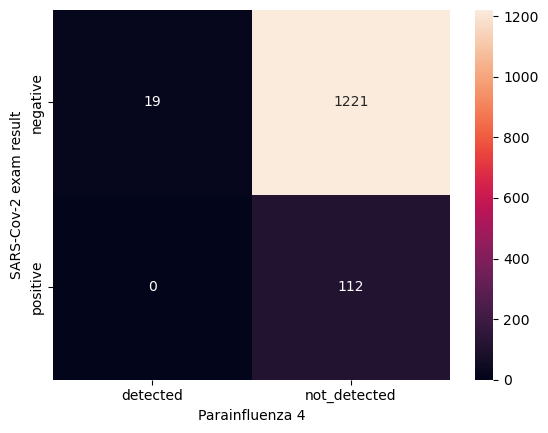

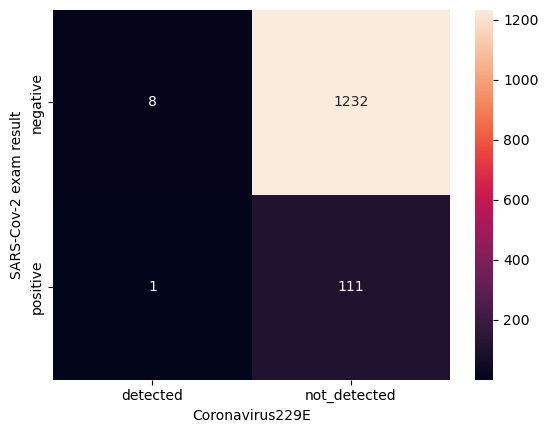

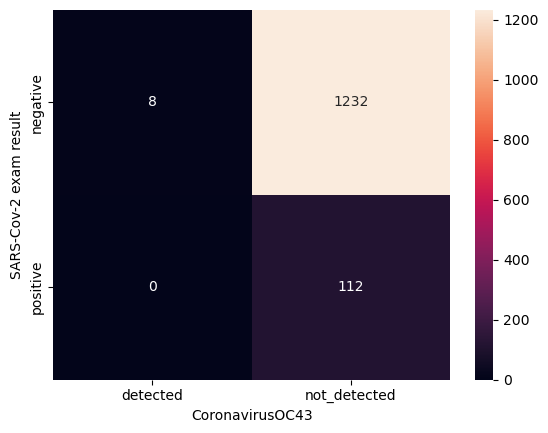

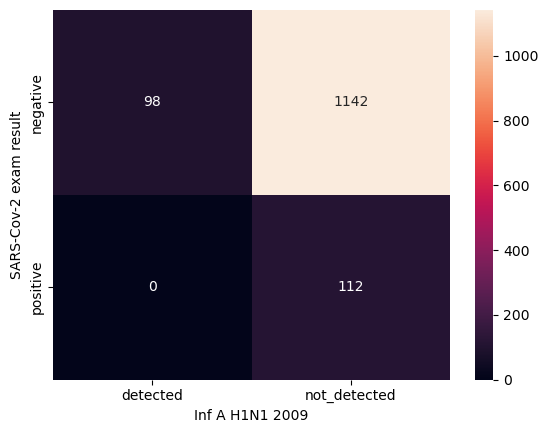

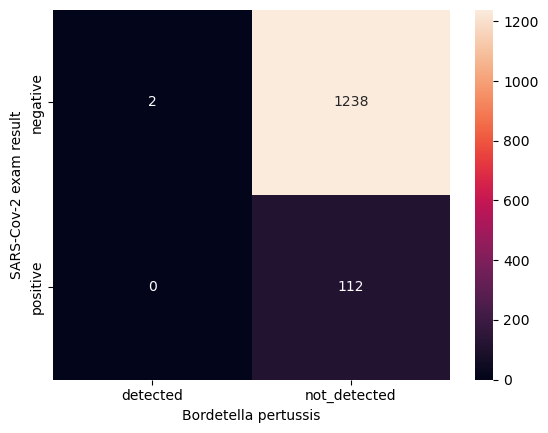

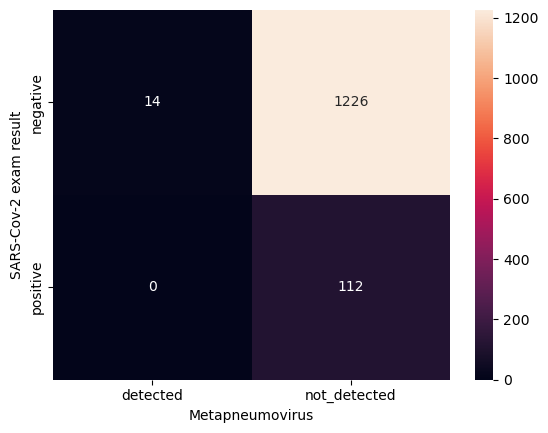

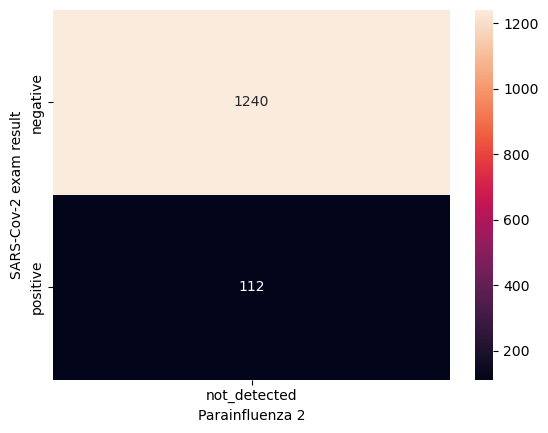

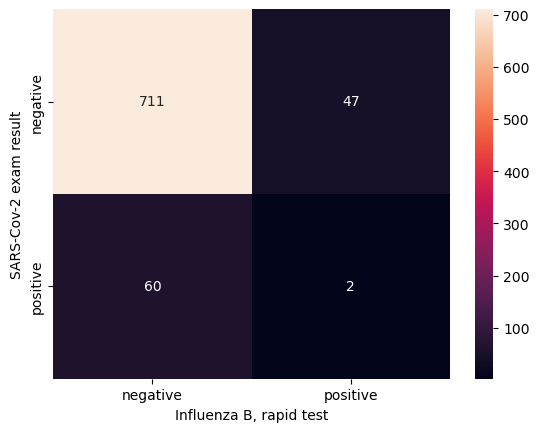

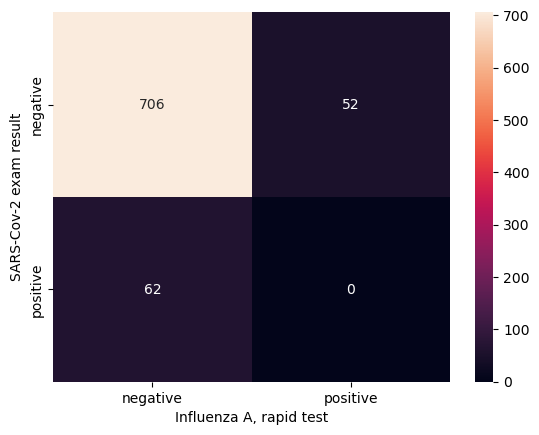

In [169]:
for col in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

# A little more advanced analysis :

## Relation between Variables  and Variables :

### Blood / Blood :

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


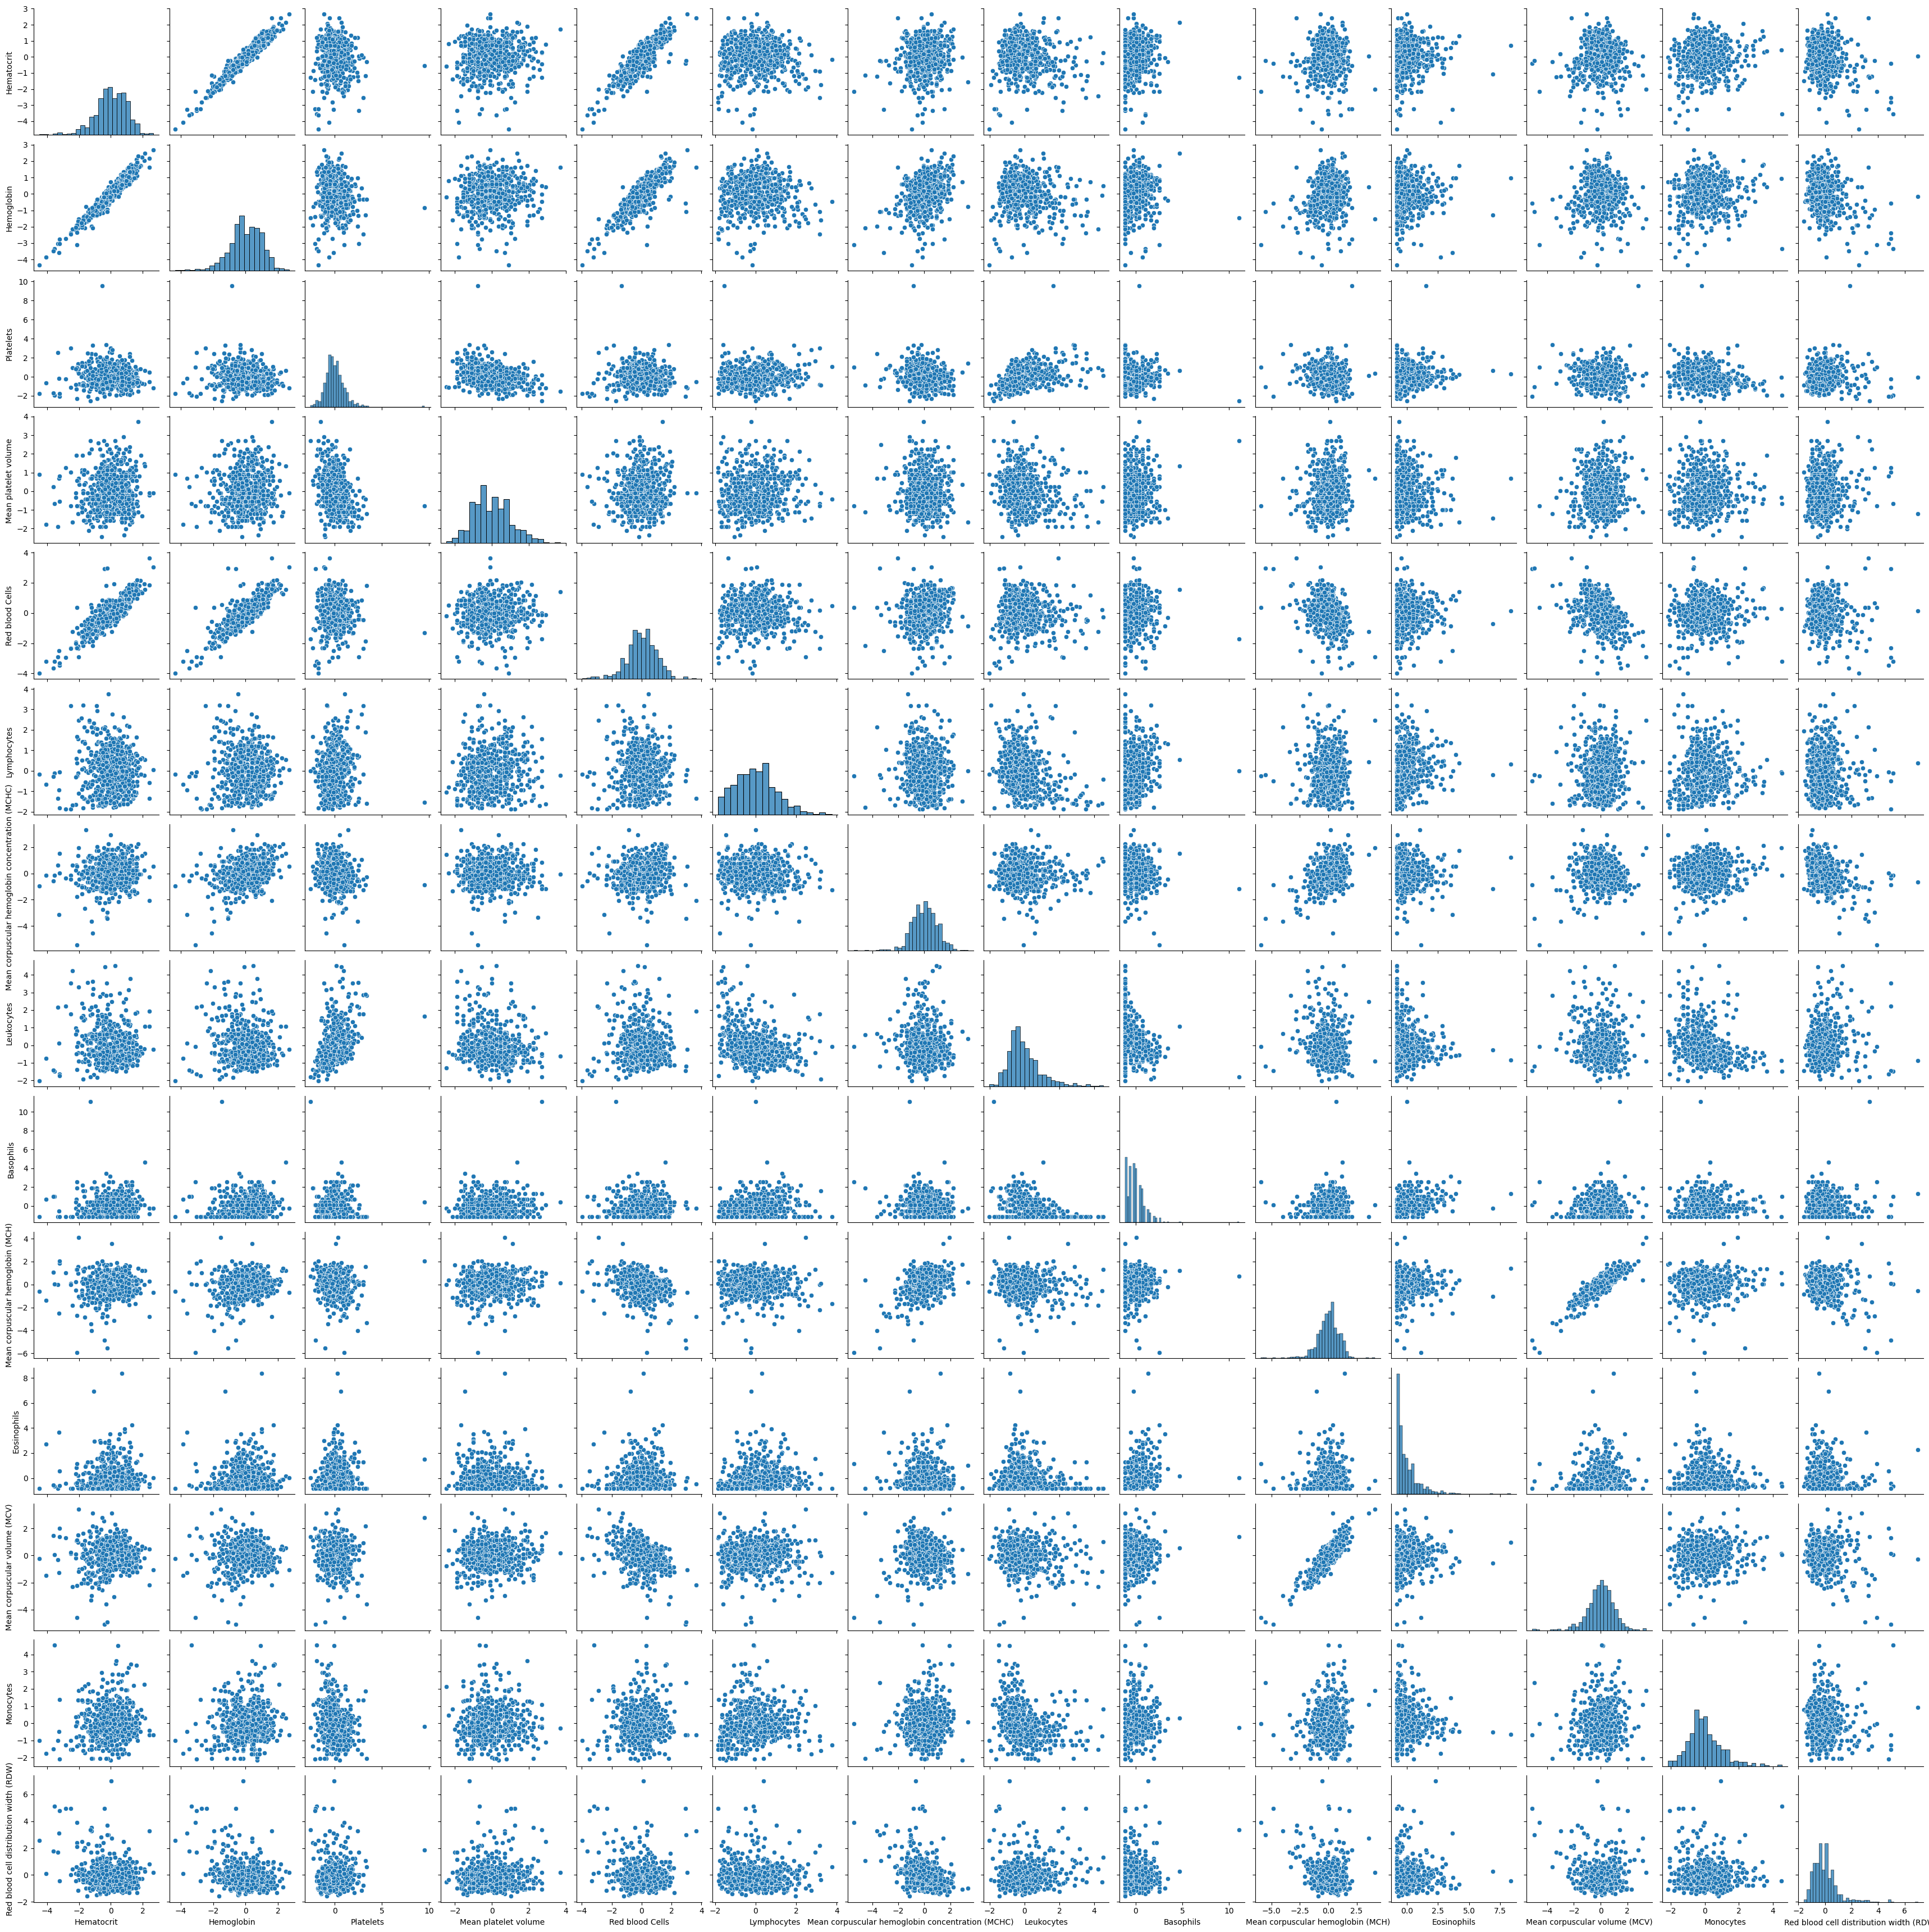

In [170]:
sns.pairplot(df[blood_col])

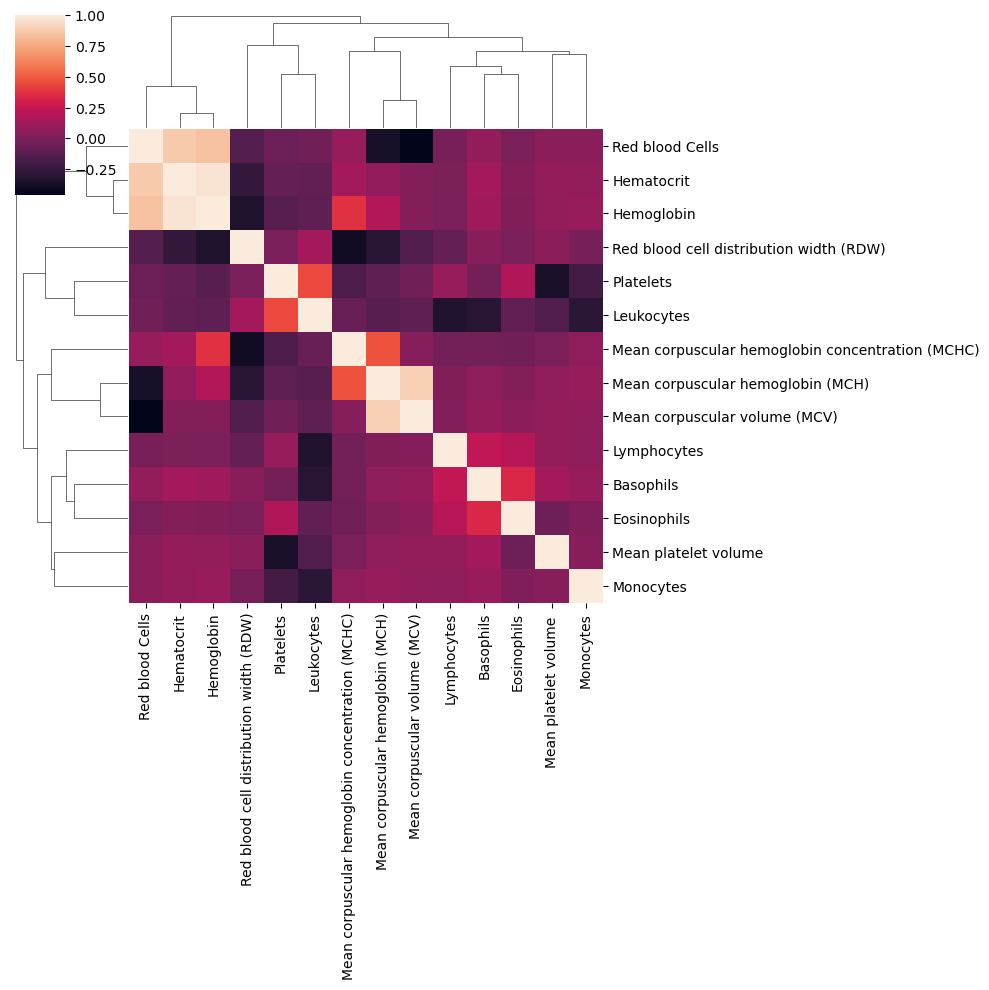

In [171]:
sns.clustermap(df[blood_col].corr())

## Relation between Age and blood : 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program

<Figure size 640x480 with 0 Axes>

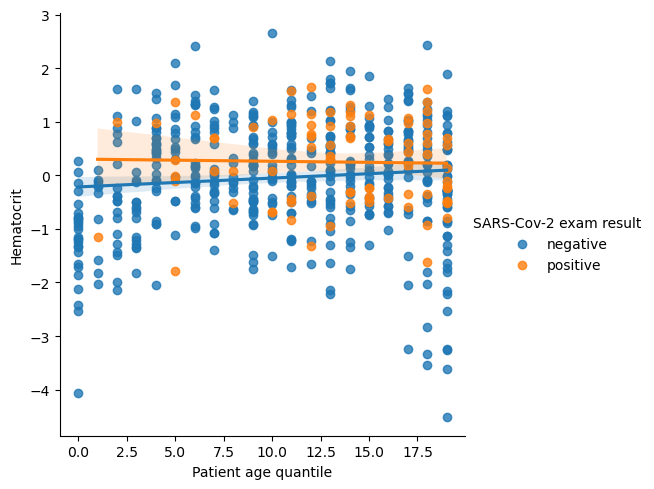

<Figure size 640x480 with 0 Axes>

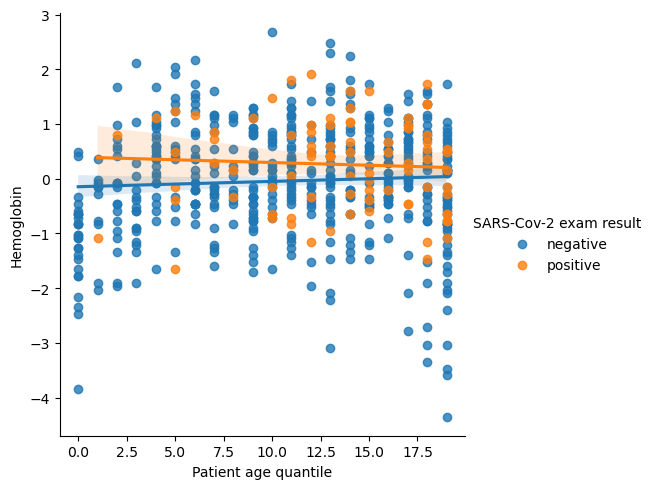

<Figure size 640x480 with 0 Axes>

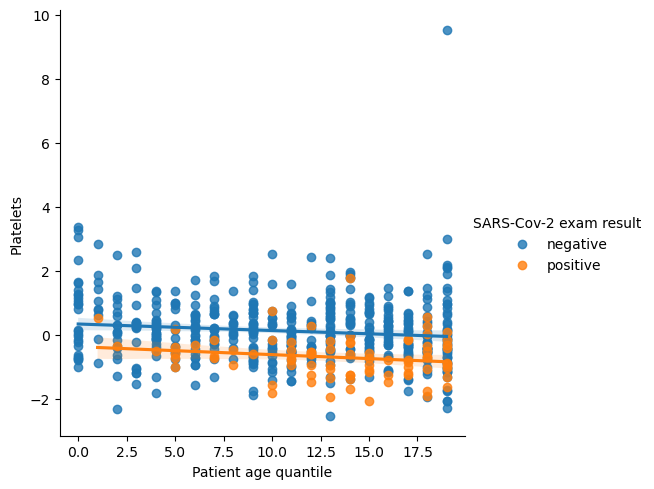

<Figure size 640x480 with 0 Axes>

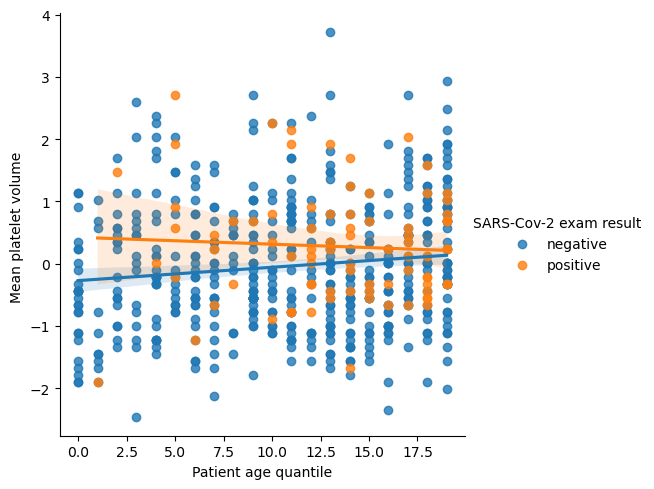

<Figure size 640x480 with 0 Axes>

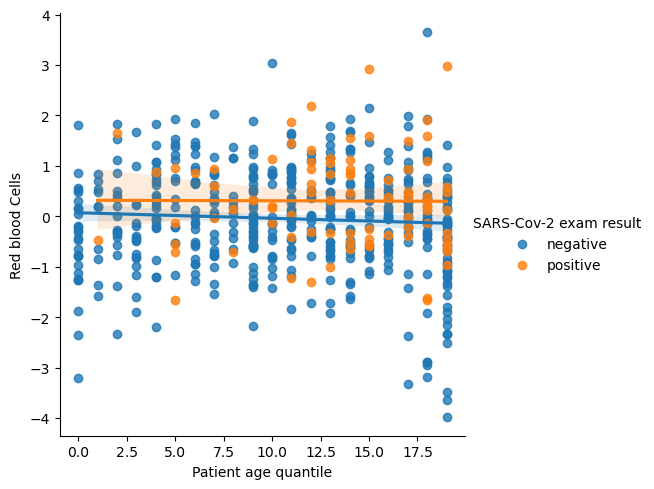

<Figure size 640x480 with 0 Axes>

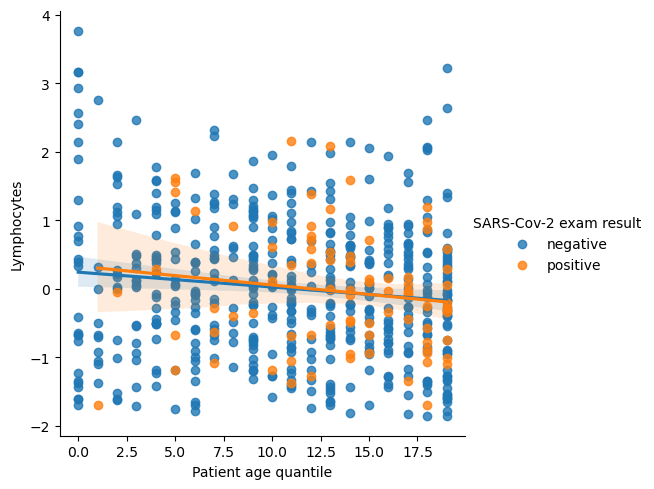

<Figure size 640x480 with 0 Axes>

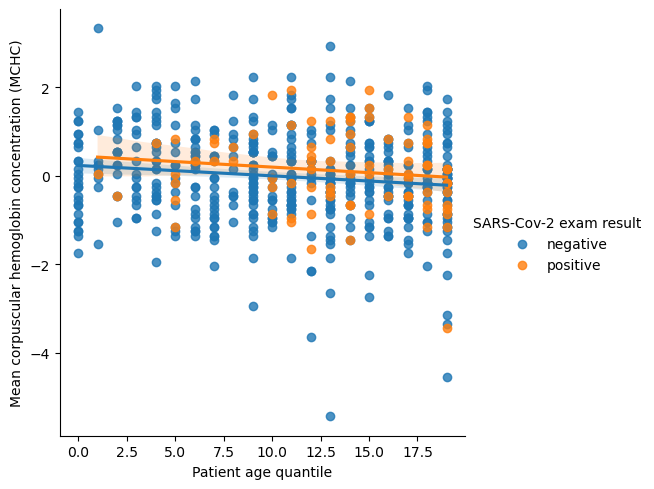

<Figure size 640x480 with 0 Axes>

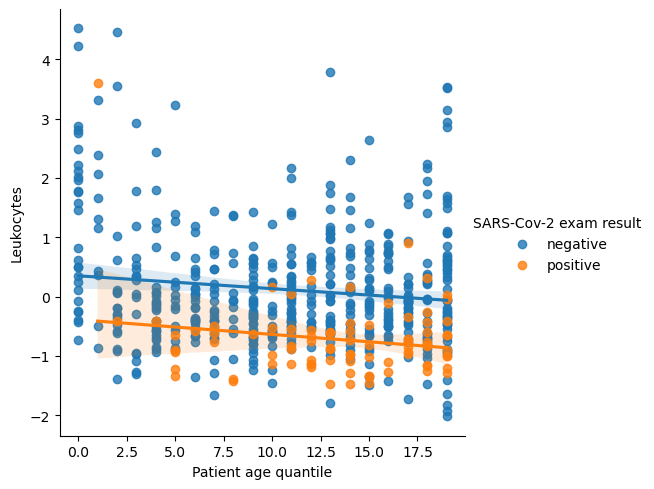

<Figure size 640x480 with 0 Axes>

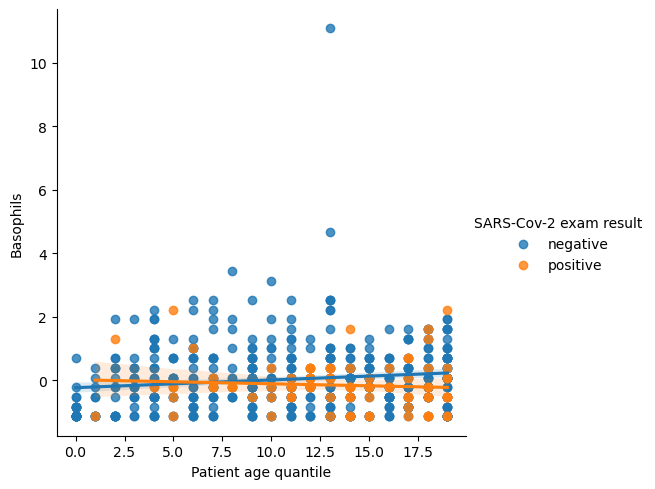

<Figure size 640x480 with 0 Axes>

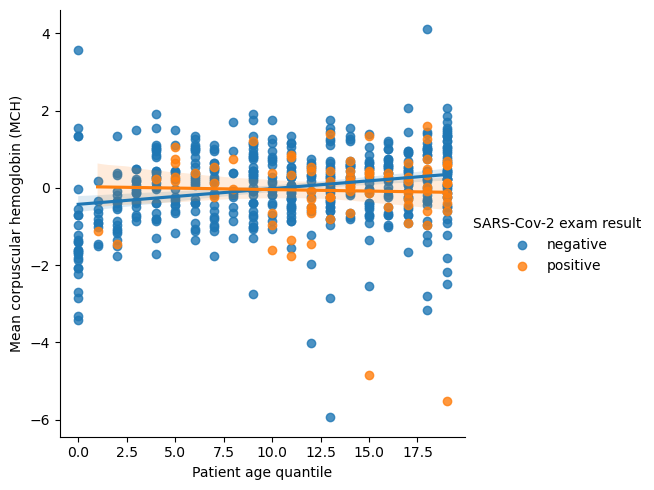

<Figure size 640x480 with 0 Axes>

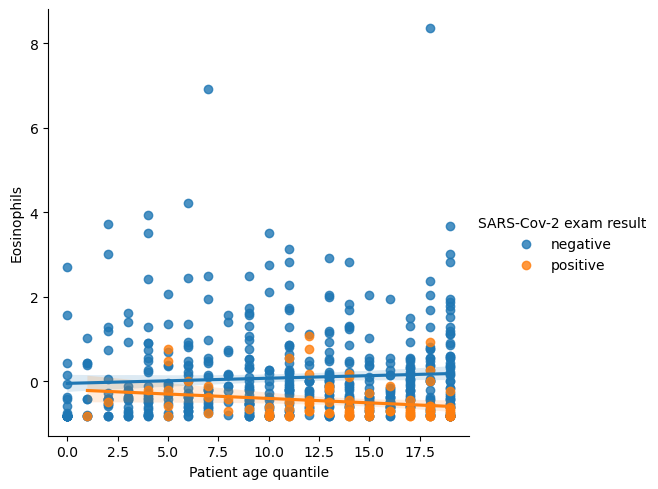

<Figure size 640x480 with 0 Axes>

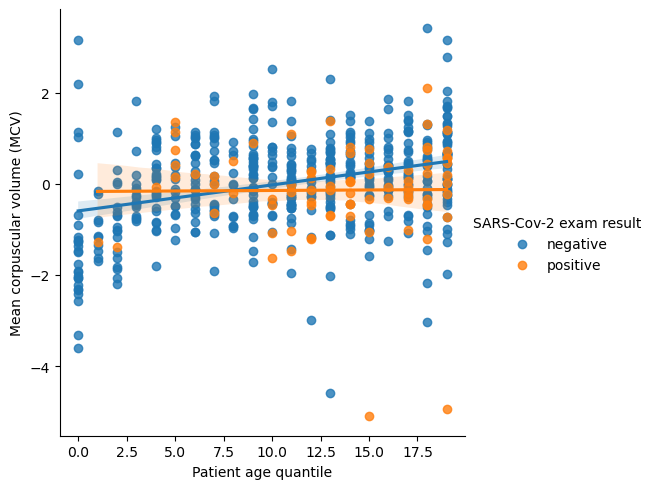

<Figure size 640x480 with 0 Axes>

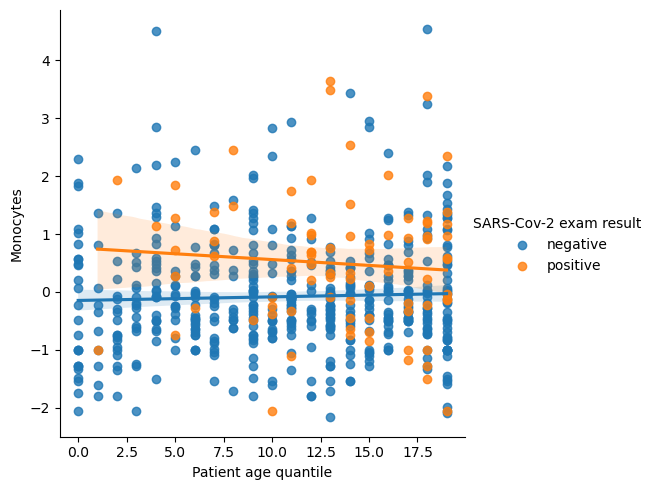

<Figure size 640x480 with 0 Axes>

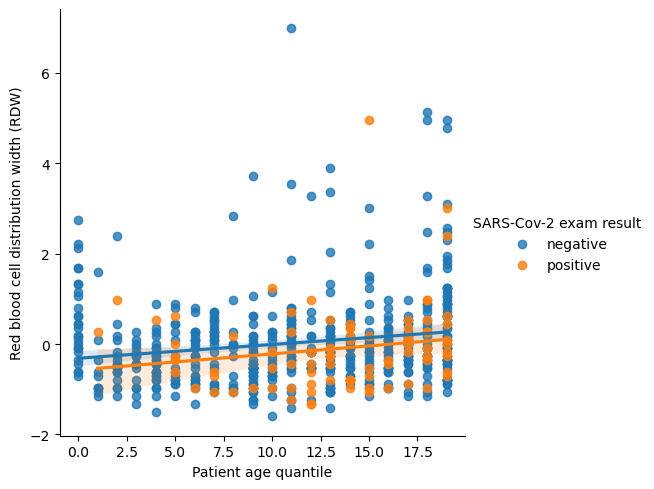

In [172]:
for col in blood_col:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [173]:
#df.corr()['Patient age quantile'].sort_values()

## Relation between Influenza and rapid test :

In [174]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [175]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## Relation between Viral and blood :

# we create a new variable named "sick" :

In [176]:
df[viral_col]

Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                            NaN           NaN           NaN             NaN   
1                   not_detected  not_detected  not_detected    not_detected   
2                            NaN           NaN           NaN             NaN   
3                            NaN           NaN           NaN             NaN   
4                   not_detected  not_detected  not_detected    not_detected   
...                          ...           ...           ...             ...   
5639                         NaN           NaN           NaN             NaN   
5640                         NaN           NaN           NaN             NaN   
5641                         NaN           NaN           NaN             NaN   
5642                         NaN           NaN           NaN             NaN   
5643                         NaN           NaN           NaN             NaN   

     CoronavirusNL63 Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                NaN                    NaN              NaN             NaN   
1       not_detected               detected     not_detected    not_detected   
2                NaN                    NaN              NaN             NaN   
3                NaN                    NaN              NaN             NaN   
4       not_detected               detected     not_detected    not_detected   
...              ...                    ...              ...             ...   
5639             NaN                    NaN              NaN             NaN   
5640             NaN                    NaN              NaN             NaN   
5641             NaN                    NaN              NaN             NaN   
5642             NaN                    NaN              NaN             NaN   
5643             NaN                    NaN              NaN             NaN   

     Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                         NaN           NaN             NaN             NaN   
1                not_detected  not_detected    not_detected    not_detected   
2                         NaN           NaN             NaN             NaN   
3                         NaN           NaN             NaN             NaN   
4                not_detected  not_detected    not_detected    not_detected   
...                       ...           ...             ...             ...   
5639                      NaN           NaN             NaN             NaN   
5640                      NaN           NaN             NaN             NaN   
5641                      NaN           NaN             NaN             NaN   
5642                      NaN           NaN             NaN             NaN   
5643                      NaN           NaN             NaN             NaN   

     CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0                NaN             NaN                  NaN             NaN   
1       not_detected    not_detected         not_detected    not_detected   
2                NaN             NaN                  NaN             NaN   
3                NaN             NaN                  NaN             NaN   
4       not_detected    not_detected         not_detected    not_detected   
...              ...             ...                  ...             ...   
5639             NaN             NaN                  NaN             NaN   
5640             NaN             NaN                  NaN             NaN   
5641             NaN             NaN                  NaN             NaN   
5642             NaN             NaN                  NaN             NaN   
5643             NaN             NaN                  NaN             NaN   

     Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  
0                NaN                     NaN                     NaN  
1       not_detected                negative                negativ

In [177]:
df[viral_col[:-2]] == 'detected' ### return 'true' if detected, and 'false' otherwise

Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  \
0                           False        False        False            False   
1                           False        False        False            False   
2                           False        False        False            False   
3                           False        False        False            False   
4                           False        False        False            False   
...                           ...          ...          ...              ...   
5639                        False        False        False            False   
5640                        False        False        False            False   
5641                        False        False        False            False   
5642                        False        False        False            False   
5643                        False        False        False            False   

      CoronavirusNL63  Rhinovirus/Enterovirus  Coronavirus HKU1  \
0               False                   False             False   
1               False                    True             False   
2               False                   False             False   
3               False                   False             False   
4               False                    True             False   
...               ...                     ...               ...   
5639            False                   False             False   
5640            False                   False             False   
5641            False                   False             False   
5642            False                   False             False   
5643            False                   False             False   

      Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  \
0               False                     False       False            False   
1               False                     False       False            False   
2               False                     False       False            False   
3               False                     False       False            False   
4               False                     False       False            False   
...               ...                       ...         ...              ...   
5639            False                     False       False            False   
5640            False                     False       False            False   
5641            False                     False       False            False   
5642            False                     False       False            False   
5643            False                     False       False            False   

      Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0               False            False            False                 False   
1               False            False            False                 False   
2               False            False            False                 False   
3               False            False            False                 False   
4               False            False            False                 False   
...               ...              ...              ...                   ...   
5639            False            False            False                 False   
5640            False            False            False                 False   
5641            False            False            False                 False   
5642            False            False            False                 False   
5643            False            False            False                 False   

      Metapneumovirus  Parainfluenza 2  
0               False            False  
1               False            False  
2               False            False  
3               False            False  
4               False            False  
...               ...              ...  
5639            Fal

In [178]:
df['sick'] = np.sum(df[viral_col[:-2]] == 'detected', axis=1) >=1 ### we create a new column named 'sick'
### True is treated as 1 and False as 0
### sick if has one 'true' at least

In [179]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

### we create two dataframe one for 'sick' and other for 'not sick'

In [180]:
df_sick = df[df['sick'] == True]
df_notsick = df[df['sick'] == False]

In [181]:
df_sick  ### we have all dataframe but only with sick people

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
1     126e9dd13932f68                    17               negative   
4     d9e41465789c2b5                    15               negative   
15    6c9d3323975b082                     9               negative   
18    d3ea751f3db9de9                    11               negative   
20    fe656baa2bfc5dd                     0               negative   
...               ...                   ...                    ...   
5285  ecb3e2ccd93f6d5                    19               negative   
5434  086a0d57415cbfc                    19               negative   
5466  c19b361d6ab2051                     0               negative   
5584  5b57f3b7c8e67d0                     0               negative   
5607  dd9c139e93b5894                     0               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
1                                                  0   
4                                                  0   
15                                                 0   
18                                                 0   
20                                                 0   
...                                              ...   
5285                                               1   
5434                                               0   
5466                                               0   
5584                                               0   
5607                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
1                                                     0       
4                                                     0       
15                                                    0       
18                                                    0       
20                                                    0       
...                                                 ...       
5285                                                  0       
5434                                                  1       
5466                                                  0       
5584                                                  0       
5607                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
1                                                     0        0.236515   
4                                                     0             NaN   
15                                                    0       -0.747693   
18                                                    0        0.991838   
20                                                    0             NaN   
...                                                 ...             ...   
5285                                                  0       -3.242548   
5434                                                  0       -0.267033   
5466                                                  1       -1.182576   
5584                                                  0       -1.869234   
5607                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
1      -0.022340  -0.517413               0.010677         0.102004   
4            NaN        NaN                    NaN              NaN   
15     -0.586244  -0.429480              -0.213711        -1.361315   
18      0.792188   0.072992              -0.550290         0.542763   
20           NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5285   -3.029827  -2.075077               0.796029        -3.476958   
5434   -0.460932   2.082882              -1.111256        -0.832405   
5466   -0.836868  -0.693278              -0.101517        -0.462168   
5584   -1.776707   0.022745              -0.550290        -0.797144   
5607         NaN        NaN                    NaN        

In [182]:
df_notsick  ### all dataframe but with not sick people 

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
5     75f16746216c4d1                     9               negative   
6     2a2245e360808d7                    13               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
2                                                  0   
3                                                  0   
5                                                  0   
6                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
2                                                     0       
3                                                     0       
5                                                     0       
6                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
2                                                     0             NaN   
3                                                     0             NaN   
5                                                     0             NaN   
6                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
5            NaN        NaN                    NaN              NaN   
6            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [183]:
blood_col

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

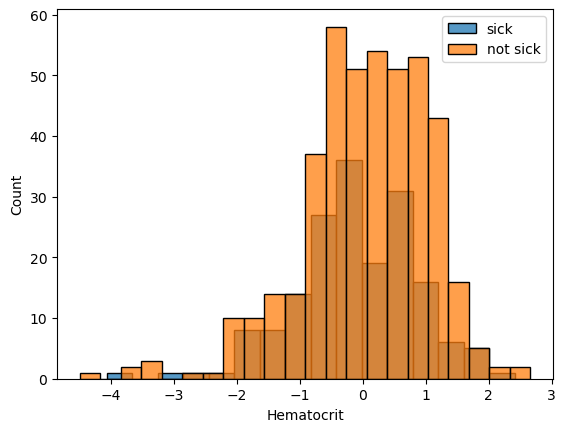

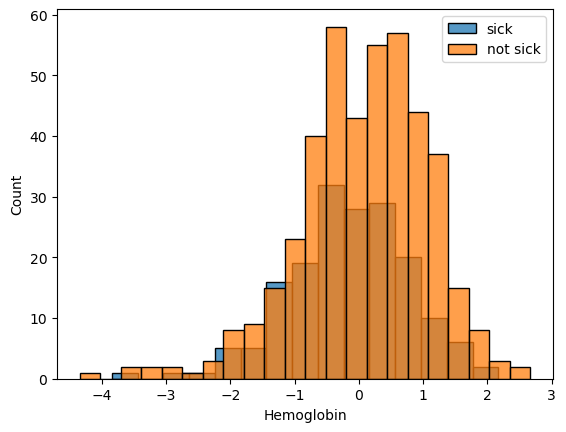

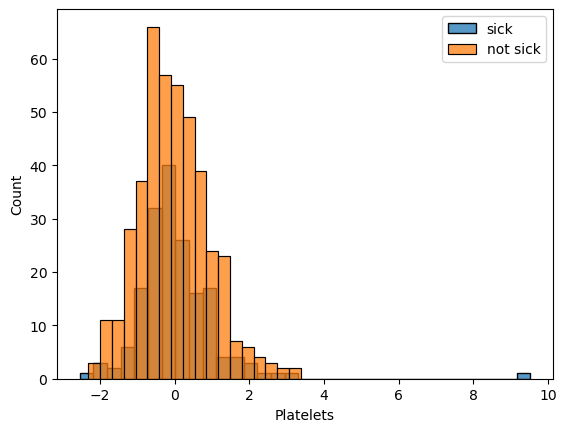

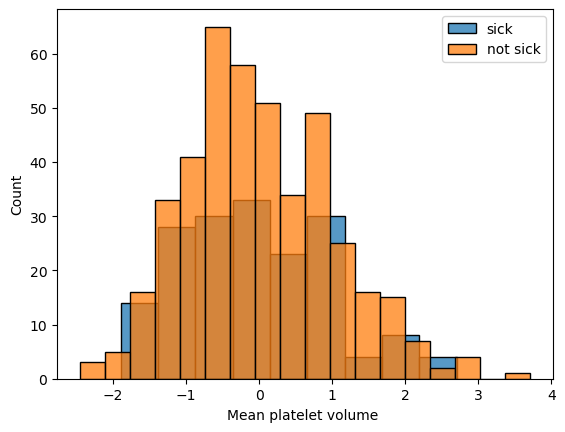

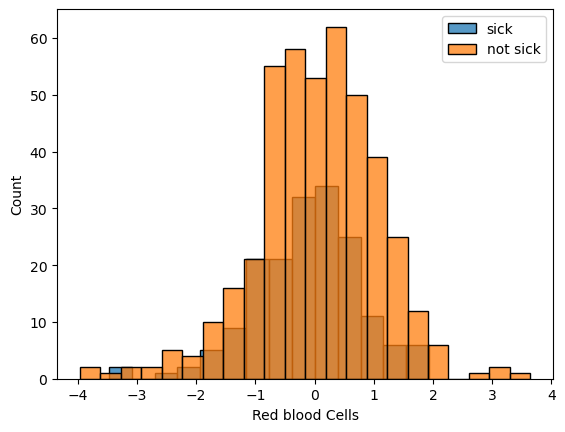

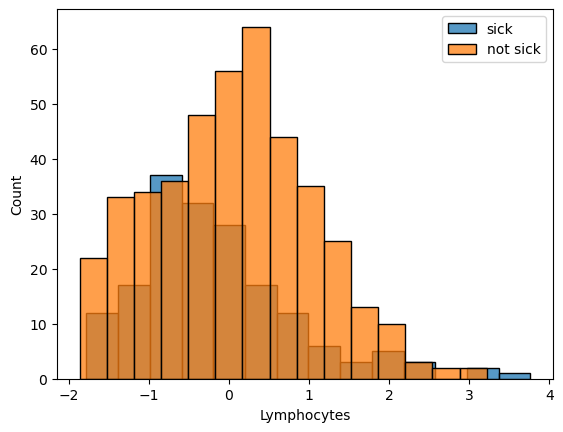

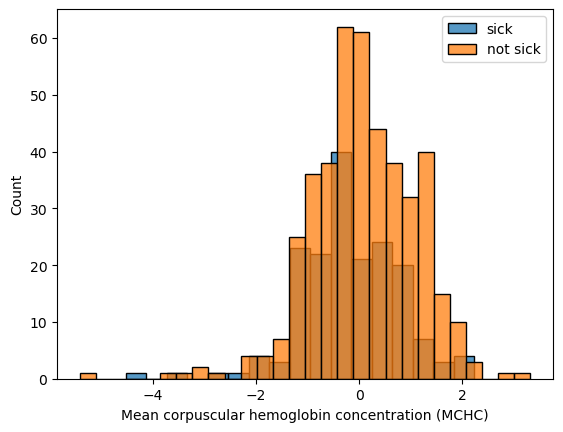

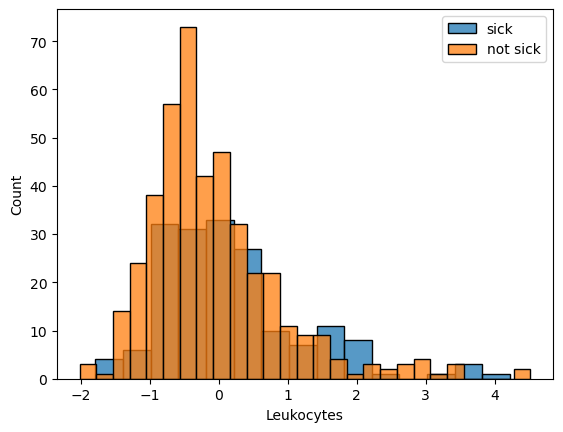

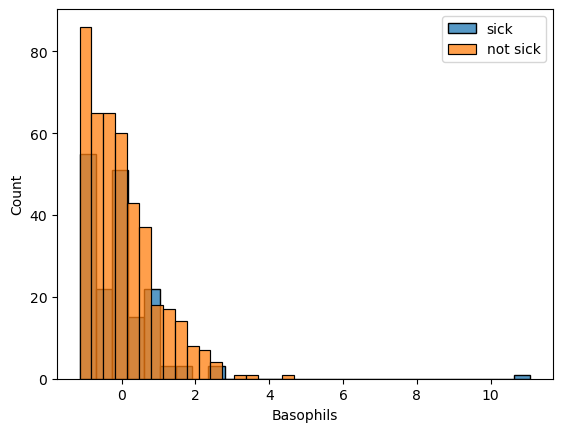

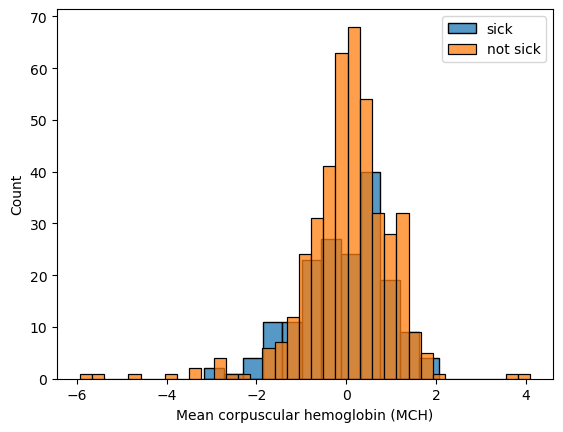

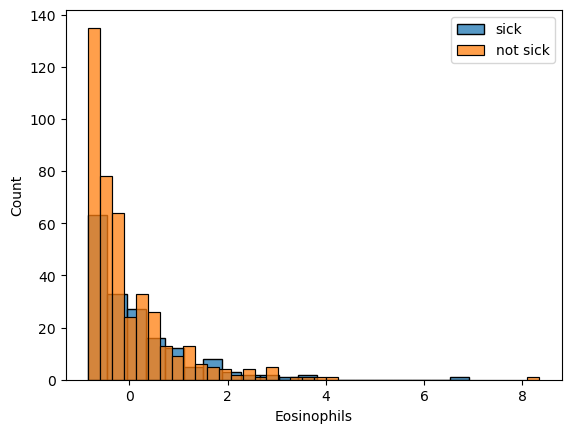

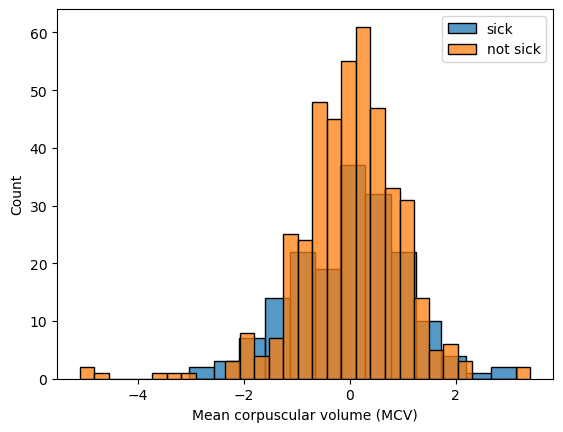

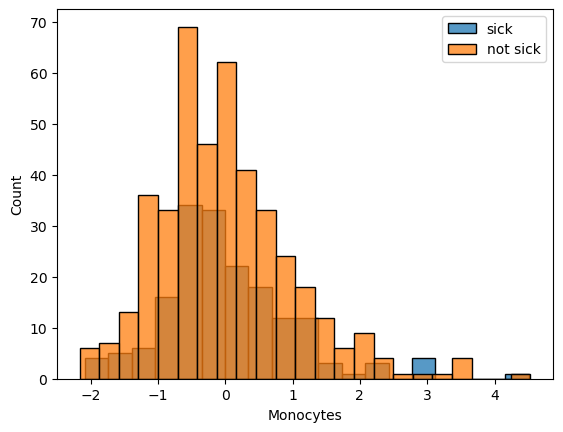

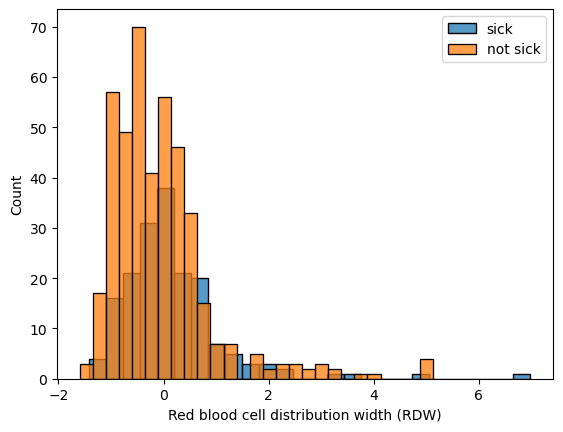

In [184]:
for col in blood_col:
    plt.figure()
    sns.histplot(df_sick[col], label='sick')
    sns.histplot(df_notsick[col], label='not sick')
    plt.legend()

### we are going to create now the 'hospitalization' function  to classify the hospitalization status of patients :

In [185]:
def hospitalization(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'monitoring'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi intensive treatment'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive care'
    else:
        return 'we dont know'

In [186]:
df['the case'] = df.apply(hospitalization, axis=1)

In [187]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [188]:
df['the case'].unique()

array(['we dont know', 'semi intensive treatment', 'monitoring',
       'intensive care'], dtype=object)

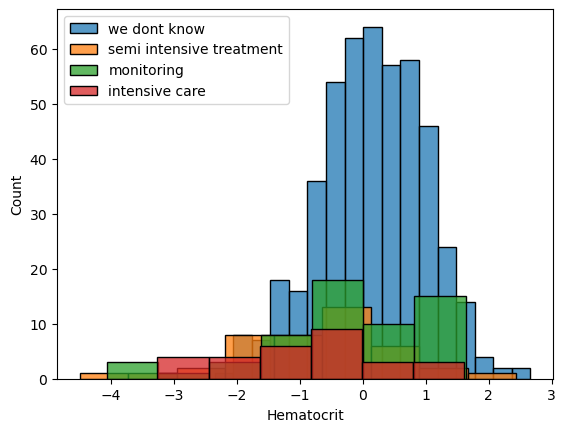

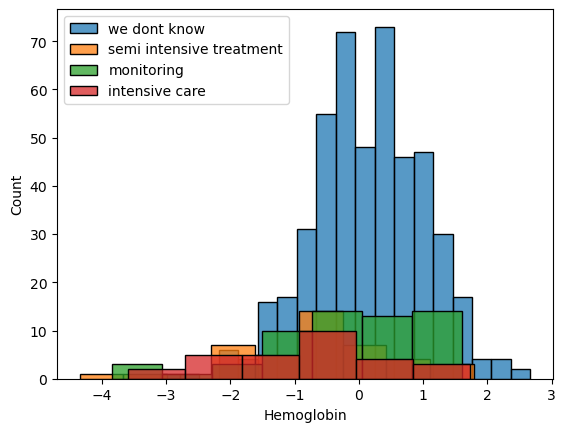

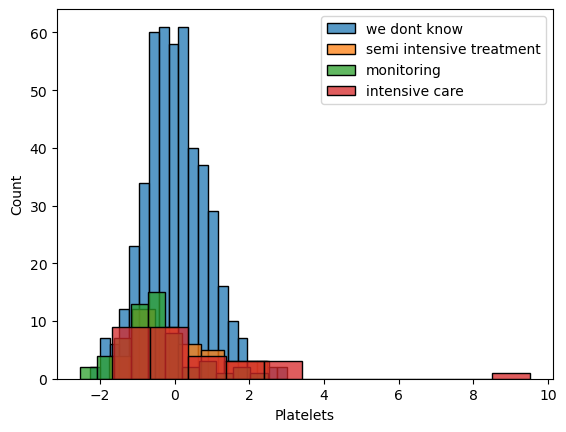

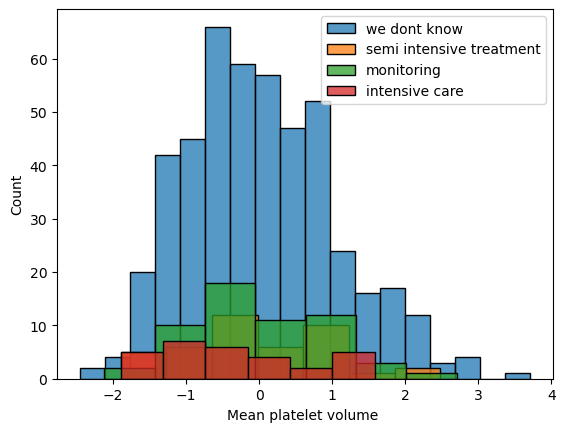

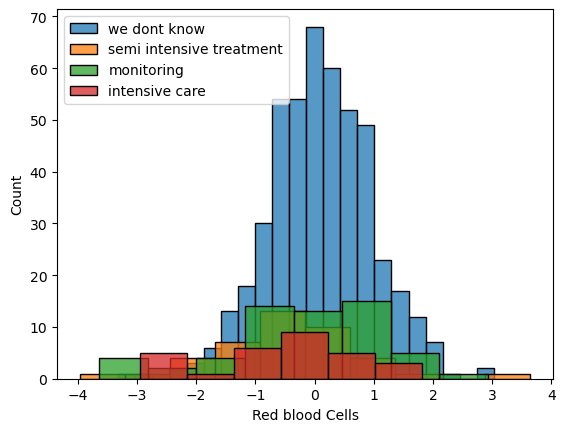

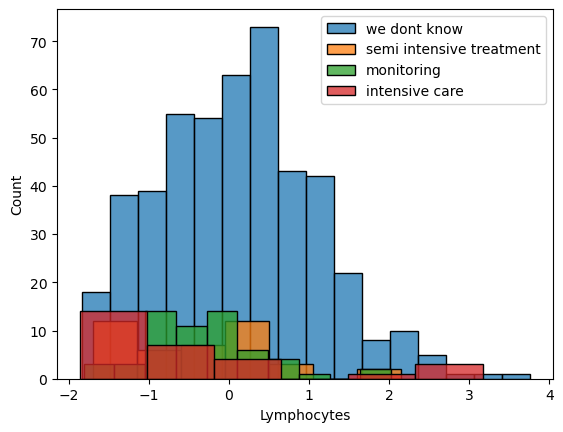

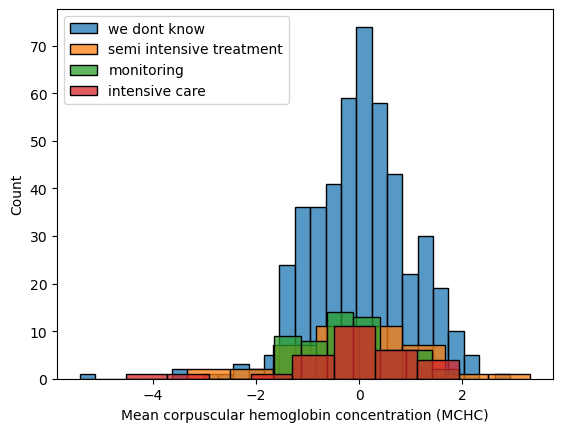

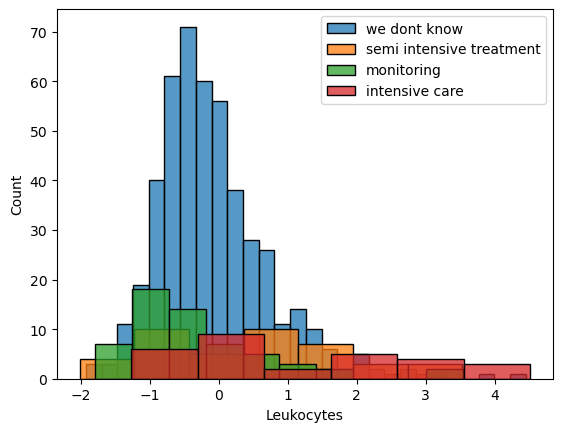

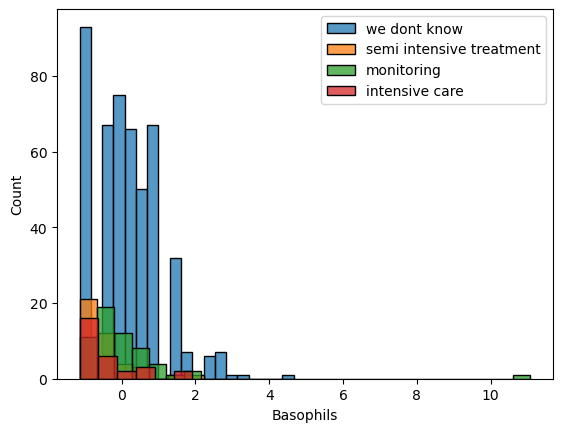

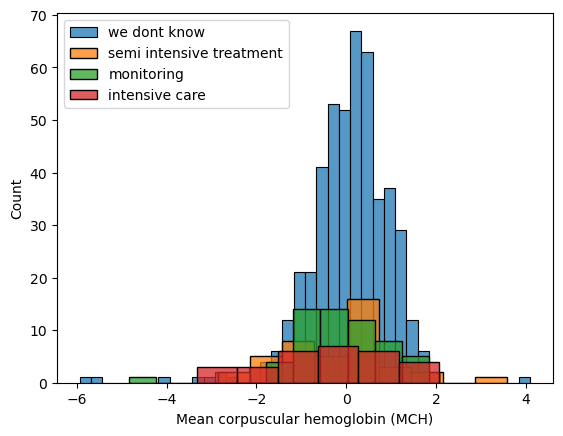

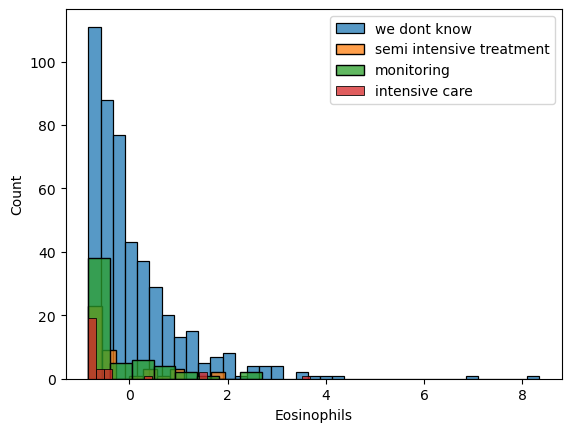

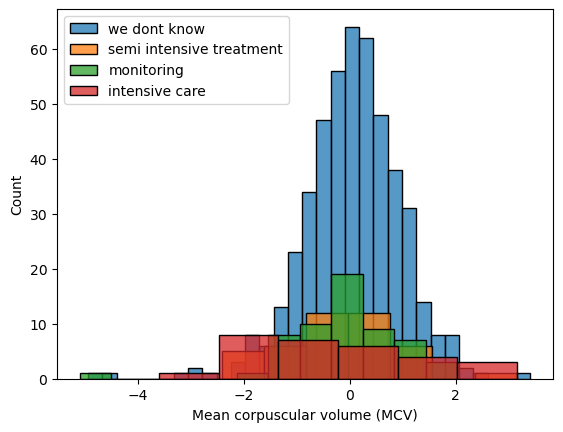

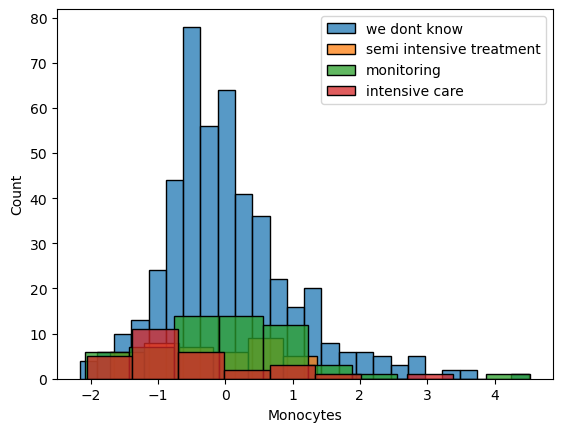

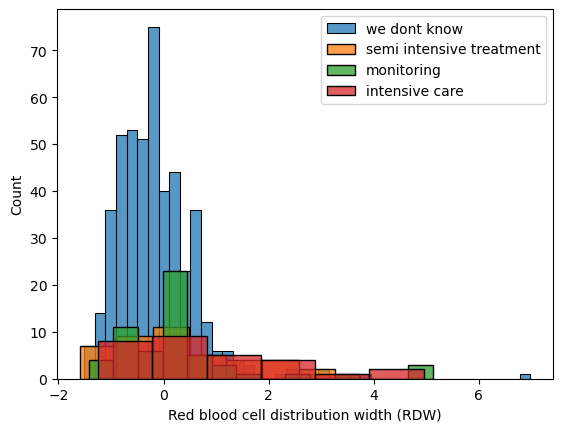

In [189]:
for col in blood_col:
    plt.figure()
    for case in df['the case'].unique():
        sns.histplot(df[df['the case']==case][col], label=case)
    plt.legend()

In [190]:
df[blood_col].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [191]:
df[viral_col].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [192]:
df1 = df[viral_col[:-2]]
df1['corona virus'] = df['SARS-Cov-2 exam result']
df1.dropna()['corona virus'].value_counts(normalize=True)

C:\Users\Mahdou\AppData\Local\Temp\ipykernel_13212\3312515358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['corona virus'] = df['SARS-Cov-2 exam result']


corona virus
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [193]:
### dropna() : removes rows with any NaN values by default.

In [194]:
df2 = df[blood_col]
df2['corona virus'] = df['SARS-Cov-2 exam result']
df2.dropna()['corona virus'].value_counts(normalize=True)

C:\Users\Mahdou\AppData\Local\Temp\ipykernel_13212\984171143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['corona virus'] = df['SARS-Cov-2 exam result']


corona virus
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

#### despite eliminating the columns containing the missing values, there remains almost the same proportions of sick and non-diseased cases

# T-Test

In [195]:
from scipy.stats import ttest_ind

In [196]:
pos_df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
67    78511c183ae18bc                     7               positive   
284   d7834ed75f2da44                    16               positive   
513   b16b49f7bd3e692                    10               positive   
568   4382f5ea05e60c4                     2               positive   
676   d3729cd2658ca64                    15               positive   
...               ...                   ...                    ...   
5632  5c386388ba3c3f0                    16               positive   
5633  9f8dfe2ae239238                     4               positive   
5634  db77903261ab6d0                    15               positive   
5639  ae66feb9e4dc3a0                     3               positive   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

## we will create a balanced dataset 

### The purpose of this line is to create a balanced dataset by ensuring that the number of negative cases matches the number of positive cases : 

In [197]:
balanc_neg = neg_df.sample(pos_df.shape[0])

In [198]:
balanc_neg

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
3005  fb8d7345fc05983                    18               negative   
2520  2cd03555a77f6b6                    17               negative   
1917  ab3f5c45b6f8747                     0               negative   
1762  f3ca3cf12e595d4                     1               negative   
3610  a389811ddc71fd6                     4               negative   
...               ...                   ...                    ...   
3943  95ac4bde1d6b342                     7               negative   
4805  ad40e815c303e98                     8               negative   
2130  29511953bb673c8                    15               negative   
3644  af5b2357c567e10                     7               negative   
1965  548482d2eadcd05                    16               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
3005                                               0   
2520                                               0   
1917                                               0   
1762                                               0   
3610                                               0   
...                                              ...   
3943                                               0   
4805                                               0   
2130                                               0   
3644                                               0   
1965                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
3005                                                  0       
2520                                                  0       
1917                                                  0       
1762                                                  0       
3610                                                  0       
...                                                 ...       
3943                                                  0       
4805                                                  0       
2130                                                  0       
3644                                                  0       
1965                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
3005                                                  0             NaN   
2520                                                  0             NaN   
1917                                                  0             NaN   
1762                                                  0             NaN   
3610                                                  0             NaN   
...                                                 ...             ...   
3943                                                  0             NaN   
4805                                                  0             NaN   
2130                                                  0             NaN   
3644                                                  0             NaN   
1965                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
3005         NaN        NaN                    NaN              NaN   
2520         NaN        NaN                    NaN              NaN   
1917         NaN        NaN                    NaN              NaN   
1762         NaN        NaN                    NaN              NaN   
3610         NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
3943         NaN        NaN                    NaN              NaN   
4805         NaN        NaN                    NaN              NaN   
2130         NaN        NaN                    NaN              NaN   
3644         NaN        NaN                    NaN              NaN   
1965         NaN        NaN                    NaN        

In [199]:
balanc_neg.shape

(558, 39)

In [200]:
pos_df.shape

(558, 39)

In [201]:
def ind_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanc_neg[col].dropna(), pos_df[col].dropna())
    if p < alpha:
        return 'we reject the null hypothesis'
    else :
        return 'we do not reject the null hypothesis'

In [202]:
for col in blood_col:
    print(f'{col :-<50} {ind_test(col)}')

Hematocrit---------------------------------------- we reject the null hypothesis
Hemoglobin---------------------------------------- we do not reject the null hypothesis
Platelets----------------------------------------- we reject the null hypothesis
Mean platelet volume ----------------------------- we do not reject the null hypothesis
Red blood Cells----------------------------------- we reject the null hypothesis
Lymphocytes--------------------------------------- we do not reject the null hypothesis
Mean corpuscular hemoglobin concentration (MCHC)-- we do not reject the null hypothesis
Leukocytes---------------------------------------- we reject the null hypothesis
Basophils----------------------------------------- we do not reject the null hypothesis
Mean corpuscular hemoglobin (MCH)----------------- we do not reject the null hypothesis
Eosinophils--------------------------------------- we reject the null hypothesis
Mean corpuscular volume (MCV)--------------------- we do not reject

# B) PRE-PROCESSING :

In [203]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

## We create a subsets : 

In [204]:
miss_val = df.isna().sum()/df.shape[0]

In [205]:
miss_val

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [206]:
blood_col = list(df.columns[(miss_val < 0.9) & (miss_val >0.88)])
viral_col = list(df.columns[(miss_val < 0.80) & (miss_val > 0.75)])

In [207]:
blood_col

['Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

In [208]:
viral_col

['Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2']

In [209]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [210]:
df = df[key_columns + blood_col + viral_col]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [211]:
df.shape

(5644, 33)

#  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [212]:
code = {'negative':0,  ### we define the encoding mapping
            'positive':1,
            'not_detected':0,
            'detected':1}

In [213]:
def encodiing(df):
    code = {'negative':0,  ### we define the encoding mapping
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:  ### we select names of object columns
        df.loc[:,col] = df[col].map(code) ## we applie our code by the 'map' function for all rows of dataframe with object col
        
    return df

In [214]:
df = encodiing(df)

In [215]:
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                      0         NaN         NaN   
1                    17                      0    0.236515    -0.02234   
2                     8                      0         NaN         NaN   
3                     5                      0         NaN         NaN   
4                    15                      0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                         0.0   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                         0.0   

  Influenza A Influenza B Parainfluenza 1 CoronavirusNL63  \
0         NaN         NaN             NaN             NaN   
1         0.0         0.0             0.0             0.0   
2         NaN         NaN             NaN             NaN   
3         NaN         NaN             NaN             NaN   
4         0.0         0.0             0.0             0.0   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1                    1.0              0.0             0.0   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4                    1.0              0.0             0.0   

  Chlamydophila pneumoniae Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN        NaN             NaN             NaN   
1                      0.0        0.0             0.0             0.0   
2                      NaN        NaN             NaN             NaN   
3                      NaN        NaN             NaN             NaN   
4                      0.0        0.0             0.0             0.0   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1             0.0             0.0                  0.0             0.0   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4             0.0             0.0                  0.0             0.0   

  Parainf

# that's gooood, we encoded our dataframe !!!

In [216]:
def feature_engineering(df):
    df['sick'] = np.sum(df[viral_col[:-2]] == 'detected', axis=1) >=1  ### creating the new column: 'sick'  
    df = df.drop(viral_col, axis=1)
    return df

In [217]:
df = feature_engineering(df)

In [218]:
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                      0         NaN         NaN   
1                    17                      0    0.236515    -0.02234   
2                     8                      0         NaN         NaN   
3                     5                      0         NaN         NaN   
4                    15                      0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)   sick  
0                                      NaN  False  
1                                -0.625073  False  
2                                      NaN  False  
3                                      NaN  False  
4                                      NaN  False

In [219]:
df.shape

(5644, 17)

In [220]:
def imputation(df):
    # Loop through each column and fill missing values with the mean of that column
    for col in df.columns:
        if df[col].isnull().any():  # Check if there are any missing values in the column
            df[col] = df[col].fillna(df[col].mean())
    return df

In [221]:
df = imputation(df)

In [222]:
df

Patient age quantile SARS-Cov-2 exam result    Hematocrit    Hemoglobin  \
0                       13                      0 -2.186214e-09 -1.601319e-08   
1                       17                      0  2.365154e-01 -2.234027e-02   
2                        8                      0 -2.186214e-09 -1.601319e-08   
3                        5                      0 -2.186214e-09 -1.601319e-08   
4                       15                      0 -2.186214e-09 -1.601319e-08   
...                    ...                    ...           ...           ...   
5639                     3                      1 -2.186214e-09 -1.601319e-08   
5640                    17                      0 -2.186214e-09 -1.601319e-08   
5641                     4                      0 -2.186214e-09 -1.601319e-08   
5642                    10                      0 -2.186214e-09 -1.601319e-08   
5643                    19                      1  6.942869e-01  5.415639e-01   

         Platelets  Mean platelet volume   Red blood Cells   Lymphocytes  \
0    -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
1    -5.174130e-01           1.067657e-02     1.020042e-01  3.183658e-01   
2    -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
3    -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
4    -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
...            ...                    ...              ...           ...   
5639 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
5640 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
5641 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
5642 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
5643 -9.068291e-01          -3.259033e-01     5.780238e-01 -2.957255e-01   

      Mean corpuscular hemoglobin concentration (MCHC)    Leukocytes  \
0                                         1.014863e-09  6.215833e-09   
1                                        -9.507903e-01 -9.461035e-02   
2                                         1.014863e-09  6.215833e-09   
3                                         1.014863e-09  6.215833e-09   
4                                         1.014863e-09  6.215833e-09   
...                                                ...           ...   
5639                                      1.014863e-09  6.215833e-09   
5640                                      1.014863e-09  6.215833e-09   
5641                                      1.014863e-09  6.215833e-09   
5642                                      1.014863e-09  6.215833e-09   
5643                                     -3.533190e-01 -1.288428e+00   

         Basophils  Mean corpuscular hemoglobin (MCH)   Eosinophils  \
0    -6.633739e-09                      -3.453010e-09  7.206147e-09   
1    -2.237665e-01                      -2.922693e-01  1.482158e+00   
2    -6.633739e-09                      -3.453010e-09  7.206147e-09   
3    -6.633739e-09                      -3.453010e-09  7.206147e-09   
4    -6.633739e-09                      -3.453010e-09  7.206147e-09   
...            ...                                ...           ...   
5639 -6.633739e-09                      -3.453010e-09  7.206147e-09   
5640 -6.633739e-09                      -3.453010e-09  7.206147e-09   
5641 -6.633739e-09                      -3.453010e-09  7.206147e-09   
5642 -6.633739e-09                      -3.453010e-09  7.206147e-09   
5643 -1.140144e+00                      -1.354549e-01 -8.355077e-01   

      Mean corpuscular volume (MCV)     Monocytes  \
0                     -4.155369e-09 -3.220114e-09   
1                      1.661924e-01  3.575467e-01   
2                     -4.155369e-09 -3.220114e-09   
3                     -4.155369e-09 -3.220114e-09   
4                     -4.155369e-09 -3.220114e-09   
...                             ...           ...   
5639                  -4.155369

# good, now we should splitting our data in training and testing :

In [223]:
df.head()

Patient age quantile SARS-Cov-2 exam result    Hematocrit    Hemoglobin  \
0                    13                      0 -2.186214e-09 -1.601319e-08   
1                    17                      0  2.365154e-01 -2.234027e-02   
2                     8                      0 -2.186214e-09 -1.601319e-08   
3                     5                      0 -2.186214e-09 -1.601319e-08   
4                    15                      0 -2.186214e-09 -1.601319e-08   

      Platelets  Mean platelet volume   Red blood Cells   Lymphocytes  \
0 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
1 -5.174130e-01           1.067657e-02     1.020042e-01  3.183658e-01   
2 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
3 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   
4 -3.535004e-10           7.438142e-09     8.424447e-09 -7.866736e-09   

   Mean corpuscular hemoglobin concentration (MCHC)    Leukocytes  \
0                                      1.014863e-09  6.215833e-09   
1                                     -9.507903e-01 -9.461035e-02   
2                                      1.014863e-09  6.215833e-09   
3                                      1.014863e-09  6.215833e-09   
4                                      1.014863e-09  6.215833e-09   

      Basophils  Mean corpuscular hemoglobin (MCH)   Eosinophils  \
0 -6.633739e-09                      -3.453010e-09  7.206147e-09   
1 -2.237665e-01                      -2.922693e-01  1.482158e+00   
2 -6.633739e-09                      -3.453010e-09  7.206147e-09   
3 -6.633739e-09                      -3.453010e-09  7.206147e-09   
4 -6.633739e-09                      -3.453010e-09  7.206147e-09   

   Mean corpuscular volume (MCV)     Monocytes  \
0                  -4.155369e-09 -3.220114e-09   
1                   1.661924e-01  3.575467e-01   
2                  -4.155369e-09 -3.220114e-09   
3                  -4.155369e-09 -3.220114e-09   
4                  -4.155369e-09 -3.220114e-09   

   Red blood cell distribution width (RDW)   sick  
0                             1.020433e-08  False  
1                            -6.250727e-01  False  
2                             1.020433e-08  False  
3                             1.020433e-08  False  
4                             1.020433e-08  False

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop(columns='SARS-Cov-2 exam result')
y = data['SARS-Cov-2 exam result']

In [225]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

In [226]:
train_set.shape

(4515, 17)

In [227]:
test_set.shape

(1129, 17)

### So far, Alll right 

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [229]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_set.drop('SARS-Cov-2 exam result', axis=1), train_set['SARS-Cov-2 exam result'])

LinearRegression()

In [230]:
predictions = model.predict(test_set.drop('SARS-Cov-2 exam result', axis=1))

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [232]:
print(test_set['SARS-Cov-2 exam result'].unique())

[0 1]


In [233]:
predictions = model.predict(test_set.drop('SARS-Cov-2 exam result', axis=1))
print(np.unique(predictions))  

[-3.05865884e-01 -3.02165214e-01 -2.83128516e-01 -2.32249574e-01
 -2.12022537e-01 -2.09161062e-01 -2.00560379e-01 -1.95729241e-01
 -1.56900781e-01 -1.55323066e-01 -1.03934004e-01 -9.94497292e-02
 -9.59584150e-02 -9.37220852e-02 -8.17577260e-02 -4.76846735e-02
 -4.04670084e-02 -3.39035563e-02 -3.32688896e-02 -2.64606352e-02
 -1.56116736e-02 -1.30338578e-02 -5.67413398e-03 -3.79690774e-03
 -2.47423214e-03 -1.49744330e-03 -1.16975379e-04  1.74299197e-03
  3.48903069e-03  1.25139699e-02  2.41676970e-02  2.58721003e-02
  3.41817496e-02  3.75426343e-02  4.28694123e-02  4.48172619e-02
  5.11284233e-02  5.22471926e-02  5.24491622e-02  5.47877174e-02
  5.87227273e-02  6.03453495e-02  6.14823101e-02  6.39690299e-02
  6.44485408e-02  6.63104087e-02  6.84399534e-02  6.85517322e-02
  6.87445534e-02  7.03297594e-02  7.26549236e-02  7.56596153e-02
  7.67581149e-02  7.80013950e-02  7.93153506e-02  8.08613063e-02
  8.49644977e-02  8.54030397e-02  8.58936810e-02  8.72976849e-02
  8.75881336e-02  8.79703

# my predictions values are not in '0' or '1', we should solving this problem !!!!

In [239]:
import numpy as np

# Assuming the output of your model is in 'predictions'
# Convert scores to binary labels using a threshold of 0
binary_predictions = (predictions >= 0.15).astype(int)

# Check the unique values in the binary predictions
print("Unique values in binary predictions:", np.unique(binary_predictions))

Unique values in binary predictions: [0 1]


In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert the actual test labels to integers if they are not already
test_labels = test_set['SARS-Cov-2 exam result'].astype(int)

# Calculate and print evaluation metrics
accuracy = accuracy_score(test_labels, binary_predictions)
precision = precision_score(test_labels, binary_predictions)
recall = recall_score(test_labels, binary_predictions)
f1 = f1_score(test_labels, binary_predictions)
cm = confusion_matrix(test_labels, binary_predictions)
report = classification_report(test_labels, binary_predictions)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8883968113374667
Precision: 0.3076923076923077
Recall: 0.10810810810810811
F1-Score: 0.16
Confusion Matrix:
[[991  27]
 [ 99  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1018
           1       0.31      0.11      0.16       111

    accuracy                           0.89      1129
   macro avg       0.61      0.54      0.55      1129
weighted avg       0.85      0.89      0.86      1129

